In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
from platform import python_version

print(python_version())

3.9.12


In [3]:
df = pd.read_csv('auto_scout_data.csv')

df.head()

make_model body_type  price       km  Type     Fuel  \
0    Audi A1    Sedans  15770  56013.0  Used   Diesel   
1    Audi A1    Sedans  14500  80000.0  Used  Benzine   
2    Audi A1    Sedans  14640  83450.0  Used   Diesel   
3    Audi A1    Sedans  14500  73000.0  Used   Diesel   
4    Audi A1    Sedans  16790  16200.0  Used   Diesel   

                                              Extras  Gears  age  \
0   Alloy wheels, Catalytic Converter, Voice Control    7.0  3.0   
1  Alloy wheels, Sport seats, Sport suspension, V...    7.0  2.0   
2                        Alloy wheels, Voice Control    7.0  3.0   
3           Alloy wheels, Sport seats, Voice Control    6.0  3.0   
4  Alloy wheels, Sport package, Sport suspension,...    7.0  3.0   

   Previous_Owners  hp_kW  Inspection_new Paint_Type Upholstery_type  \
0              2.0   66.0               1   Metallic           Cloth   
1              1.0  141.0               0   Metallic           Cloth   
2              1.0   85.0               0   Metallic           Cloth   
3              1.0   66.0               0   Metallic           Cloth   
4              1.0   66.0               1   Metallic           Cloth   

  Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  \
0    Automatic           1422.0     1220.0       front        3.8   
1    Automatic           1798.0     1255.0       front        5.6   
2    Automatic           1598.0     1135.0       front        3.8   
3    Automatic           1422.0     1195.0       front        3.8   
4    Automatic           1422.0     1135.0       front        4.1   

   CO2_Emission Comfort_Convenience_Package Entertainment_Media_Package  \
0          99.0                     Premium                        Plus   
1         129.0                    Standard                        Plus   
2          99.0                     Premium                    Standard   
3          99.0                    Standard                        Plus   
4         109.0                     Premium                        Plus   

  Safety_Security_Package  
0  Safety Premium Package  
1  Safety Premium Package  
2  Safety Premium Package  
3  Safety Premium Package  
4  Safety Premium Package

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   price                        15909 non-null  int64  
 3   km                           15909 non-null  float64
 4   Type                         15909 non-null  object 
 5   Fuel                         15909 non-null  object 
 6   Extras                       15909 non-null  object 
 7   Gears                        15909 non-null  float64
 8   age                          15909 non-null  float64
 9   Previous_Owners              15909 non-null  float64
 10  hp_kW                        15909 non-null  float64
 11  Inspection_new               15909 non-null  int64  
 12  Paint_Type                   15909 non-null  object 
 13  Upholstery_type 

In [5]:
df.describe()

price             km         Gears           age  \
count  15909.000000   15909.000000  15909.000000  15909.000000   
mean   18020.241876   32092.436526      5.937268      1.389591   
std     7377.200813   36982.838757      0.704943      1.121355   
min     4950.000000       0.000000      5.000000      0.000000   
25%    12850.000000    1913.000000      5.000000      0.000000   
50%    16900.000000   20410.000000      6.000000      1.000000   
75%    21900.000000   46900.000000      6.000000      2.000000   
max    74600.000000  317000.000000      8.000000      3.000000   

       Previous_Owners         hp_kW  Inspection_new  Displacement_cc  \
count     15909.000000  15909.000000    15909.000000     15909.000000   
mean          1.042869     88.493746        0.247156      1428.657364   
std           0.339241     26.671943        0.431372       275.852413   
min           0.000000     40.000000        0.000000       890.000000   
25%           1.000000     66.000000        0.000000      1229.000000   
50%           1.000000     85.000000        0.000000      1461.000000   
75%           1.000000    103.000000        0.000000      1598.000000   
max           4.000000    294.000000        1.000000      2967.000000   

          Weight_kg     cons_comb  CO2_Emission  
count  15909.000000  15909.000000  15909.000000  
mean    1337.675467      4.824329    117.783110  
std      199.672043      0.887890     18.022786  
min      840.000000      3.000000     45.000000  
25%     1165.000000      4.000000    104.000000  
50%     1295.000000      4.800000    117.000000  
75%     1472.000000      5.400000    129.000000  
max     2471.000000      9.100000    253.000000

In [6]:
df.isnull().sum()

make_model                     0
body_type                      0
price                          0
km                             0
Type                           0
Fuel                           0
Extras                         0
Gears                          0
age                            0
Previous_Owners                0
hp_kW                          0
Inspection_new                 0
Paint_Type                     0
Upholstery_type                0
Gearing_Type                   0
Displacement_cc                0
Weight_kg                      0
Drive_chain                    0
cons_comb                      0
CO2_Emission                   0
Comfort_Convenience_Package    0
Entertainment_Media_Package    0
Safety_Security_Package        0
dtype: int64

#### Feature Engineering

In [7]:
df_object = df.select_dtypes(include ="object").head()

df_object

make_model body_type  Type     Fuel  \
0    Audi A1    Sedans  Used   Diesel   
1    Audi A1    Sedans  Used  Benzine   
2    Audi A1    Sedans  Used   Diesel   
3    Audi A1    Sedans  Used   Diesel   
4    Audi A1    Sedans  Used   Diesel   

                                              Extras Paint_Type  \
0   Alloy wheels, Catalytic Converter, Voice Control   Metallic   
1  Alloy wheels, Sport seats, Sport suspension, V...   Metallic   
2                        Alloy wheels, Voice Control   Metallic   
3           Alloy wheels, Sport seats, Voice Control   Metallic   
4  Alloy wheels, Sport package, Sport suspension,...   Metallic   

  Upholstery_type Gearing_Type Drive_chain Comfort_Convenience_Package  \
0           Cloth    Automatic       front                     Premium   
1           Cloth    Automatic       front                    Standard   
2           Cloth    Automatic       front                     Premium   
3           Cloth    Automatic       front                    Standard   
4           Cloth    Automatic       front                     Premium   

  Entertainment_Media_Package Safety_Security_Package  
0                        Plus  Safety Premium Package  
1                        Plus  Safety Premium Package  
2                    Standard  Safety Premium Package  
3                        Plus  Safety Premium Package  
4                        Plus  Safety Premium Package

In [8]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 8
body_type                     : 8
Type                          : 5
Fuel                          : 3
Extras                        : 659
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3
Comfort_Convenience_Package   : 3
Entertainment_Media_Package   : 2
Safety_Security_Package       : 3


In [9]:
for i in df.Extras:
    print(i)
    
# check the status of the 'Extras' feature in the line above

# we will apply a series of operations

Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Sport seats, Sport suspension, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Sport package, Sport suspension, Voice Control
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Shift paddles
Alloy wheels, Sport seats
Alloy wheels, Catalytic Converter, Sport package, Sport seats, Sport suspension, Voice Control
Alloy wheels, Sport seats, Sport suspension
Alloy wheels, Sport seats, Sport suspension
Alloy wheels
Alloy wheels, Sport package, Sport seats
Alloy wheels, Sport package
Alloy wheels
Alloy wheels, Catalytic Converter, Shift paddles, Voice Control
Alloy wheels, Shift paddles, Sport package, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Catalytic Converter, Sport seats, Voice Control, Winter tyres
Alloy wheels
Alloy wheels, Voice C

In [10]:
for i in df.Extras:
    print(i)
    
# let's check the feature first

# Whichever vehicle has more features, we will ask the model to give more weight to that vehicle

Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Sport seats, Sport suspension, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Sport package, Sport suspension, Voice Control
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Shift paddles
Alloy wheels, Sport seats
Alloy wheels, Catalytic Converter, Sport package, Sport seats, Sport suspension, Voice Control
Alloy wheels, Sport seats, Sport suspension
Alloy wheels, Sport seats, Sport suspension
Alloy wheels
Alloy wheels, Sport package, Sport seats
Alloy wheels, Sport package
Alloy wheels
Alloy wheels, Catalytic Converter, Shift paddles, Voice Control
Alloy wheels, Shift paddles, Sport package, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Catalytic Converter, Sport seats, Voice Control, Winter tyres
Alloy wheels
Alloy wheels, Voice C

In [11]:
for i in df.Extras:
    print(len(i.split(",")))
    
# for this reason, we will count features of vehicles

3
4
2
3
4
4
4
1
1
1
2
2
6
3
3
1
3
2
1
4
4
3
5
1
2
2
2
1
1
1
1
2
2
1
1
1
1
1
3
2
1
1
1
1
1
2
1
1
3
3
2
1
3
1
1
1
1
1
3
1
3
3
3
1
1
1
2
1
6
3
3
3
4
4
2
4
3
4
5
3
1
4
4
4
1
5
1
2
4
6
2
2
4
3
1
1
1
1
5
2
1
1
1
1
3
3
3
1
3
2
3
1
2
3
3
1
3
4
1
3
2
2
1
1
4
3
2
5
2
2
1
1
3
3
1
2
3
3
3
2
2
1
6
4
2
3
2
3
3
3
2
1
3
3
1
2
3
2
1
1
4
3
3
1
3
4
2
4
1
3
1
2
2
1
2
3
2
4
3
2
3
2
2
3
5
2
3
3
5
1
1
1
4
1
3
1
2
3
1
1
4
3
2
1
4
1
4
3
1
2
2
2
1
1
2
3
4
1
2
3
1
5
1
3
2
1
1
3
1
1
5
1
2
3
2
3
2
1
3
1
5
3
1
1
4
1
3
1
4
7
3
4
1
2
4
3
2
3
4
4
2
1
1
1
2
2
4
2
4
1
3
2
2
3
1
4
3
1
2
3
5
2
3
1
2
1
1
4
4
2
5
4
4
4
4
4
4
4
4
2
4
1
4
2
4
1
1
1
2
1
2
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
2
2
3
1
1
2
1
1
2
3
3
2
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
1
2
3
3
3
3
3
3
3
2
2
6
4
2
6
1
4
5
2
2
3
3
3
3
3
3
5
2
4
3
3
3
2
2
1
3
2
1
3
3
3
2
3
5
1
1
3
5
1
1
4
1
1
1
2
1
3
3
2
4
3
3
3
4
1
1
1
1
3
1
3
5
1
2
4
1
4
3
3
5
2
1
1
2
1
2
2
2
1
3
1
1
8
7
2
1
1
2
2
1
5
1
3
4
4
3
2
1
1
1
3
4
1
1
1
1
1
1
1
2
1
2
1
2
2
1
1
4
2
3
1
1
1
1
1
4
1
4
3
2
2
2
3
1
5
1


In [12]:
df.Extras.apply(lambda x: len(x.split(',')))

0        3
1        4
2        2
3        3
4        4
        ..
15904    2
15905    3
15906    1
15907    2
15908    2
Name: Extras, Length: 15909, dtype: int64

In [13]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

# we replace numeric values with categorical values

In [14]:
df.head()

make_model body_type  price       km  Type     Fuel  Extras  Gears  age  \
0    Audi A1    Sedans  15770  56013.0  Used   Diesel       3    7.0  3.0   
1    Audi A1    Sedans  14500  80000.0  Used  Benzine       4    7.0  2.0   
2    Audi A1    Sedans  14640  83450.0  Used   Diesel       2    7.0  3.0   
3    Audi A1    Sedans  14500  73000.0  Used   Diesel       3    6.0  3.0   
4    Audi A1    Sedans  16790  16200.0  Used   Diesel       4    7.0  3.0   

   Previous_Owners  hp_kW  Inspection_new Paint_Type Upholstery_type  \
0              2.0   66.0               1   Metallic           Cloth   
1              1.0  141.0               0   Metallic           Cloth   
2              1.0   85.0               0   Metallic           Cloth   
3              1.0   66.0               0   Metallic           Cloth   
4              1.0   66.0               1   Metallic           Cloth   

  Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  \
0    Automatic           1422.0     1220.0       front        3.8   
1    Automatic           1798.0     1255.0       front        5.6   
2    Automatic           1598.0     1135.0       front        3.8   
3    Automatic           1422.0     1195.0       front        3.8   
4    Automatic           1422.0     1135.0       front        4.1   

   CO2_Emission Comfort_Convenience_Package Entertainment_Media_Package  \
0          99.0                     Premium                        Plus   
1         129.0                    Standard                        Plus   
2          99.0                     Premium                    Standard   
3          99.0                    Standard                        Plus   
4         109.0                     Premium                        Plus   

  Safety_Security_Package  
0  Safety Premium Package  
1  Safety Premium Package  
2  Safety Premium Package  
3  Safety Premium Package  
4  Safety Premium Package

In [15]:
df.Extras.nunique() 

# it was 659 unique variable and we have just ten now

10

In [16]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']
Comfort_Convenience_Package   : ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package   : ['Plus' 'Standard']
Safety_Security_Package       : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [17]:
df.make_model.value_counts()

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

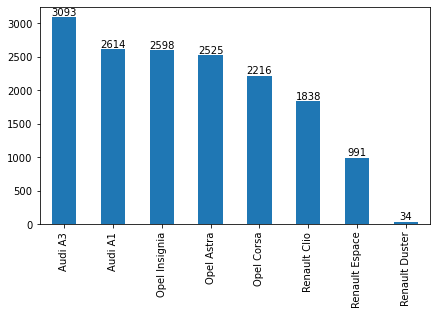

In [18]:
ax = df.make_model.value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

In [19]:
df2 = df.copy()

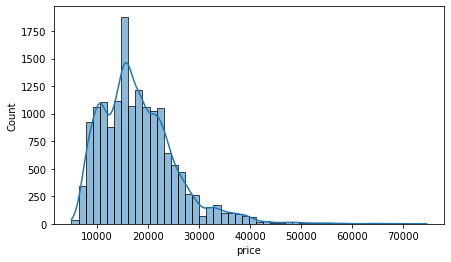

In [20]:
sns.histplot(df.price, bins=50, kde=True);

In [21]:
df_numeric = df.select_dtypes(include ="number")

df_numeric

price            km  Extras  Gears  age  Previous_Owners  hp_kW  \
0      15770  56013.000000       3    7.0  3.0              2.0   66.0   
1      14500  80000.000000       4    7.0  2.0              1.0  141.0   
2      14640  83450.000000       2    7.0  3.0              1.0   85.0   
3      14500  73000.000000       3    6.0  3.0              1.0   66.0   
4      16790  16200.000000       4    7.0  3.0              1.0   66.0   
...      ...           ...     ...    ...  ...              ...    ...   
15904  39950   1647.362609       2    6.0  0.0              1.0  147.0   
15905  39885   9900.000000       3    7.0  0.0              1.0  165.0   
15906  39875     15.000000       1    6.0  0.0              1.0  146.0   
15907  39700     10.000000       2    6.0  0.0              1.0  147.0   
15908  40999   1647.362609       2    6.0  0.0              1.0  165.0   

       Inspection_new  Displacement_cc  Weight_kg  cons_comb  CO2_Emission  
0                   1           1422.0     1220.0        3.8          99.0  
1                   0           1798.0     1255.0        5.6         129.0  
2                   0           1598.0     1135.0        3.8          99.0  
3                   0           1422.0     1195.0        3.8          99.0  
4                   1           1422.0     1135.0        4.1         109.0  
...               ...              ...        ...        ...           ...  
15904               0           1997.0     1758.0        5.3         139.0  
15905               0           1798.0     1708.0        7.4         168.0  
15906               1           1997.0     1734.0        5.3         139.0  
15907               0           1997.0     1758.0        5.3         139.0  
15908               1           1798.0     1685.0        6.8         153.0  

[15909 rows x 12 columns]

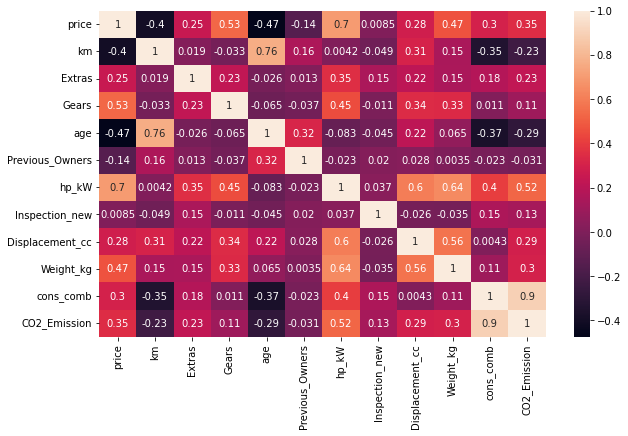

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot =True);

#### Check Outliers

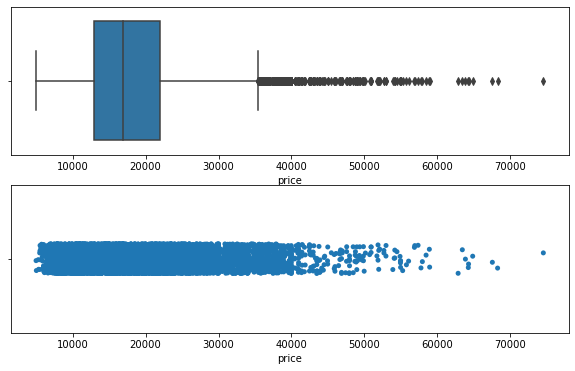

In [23]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

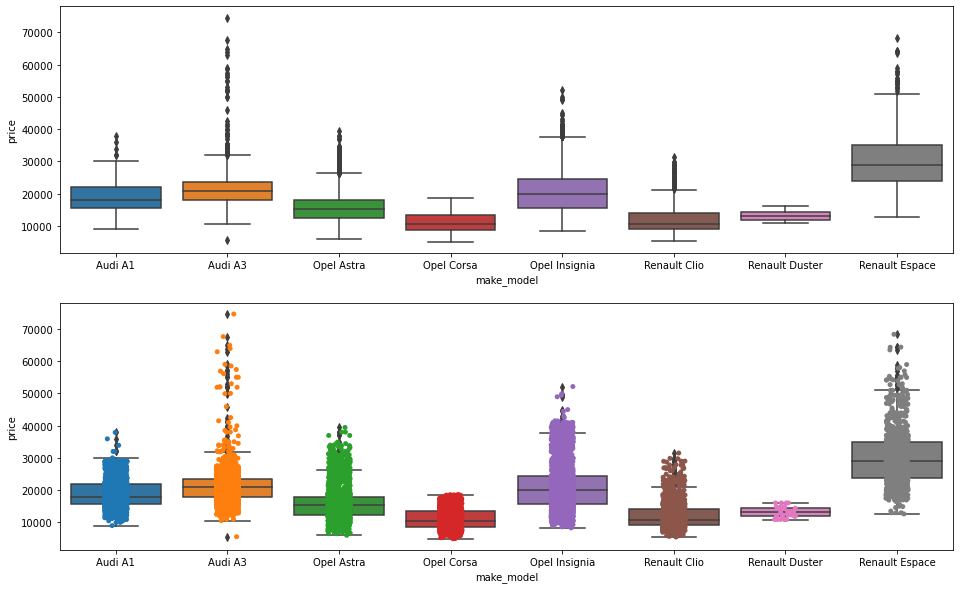

In [24]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)

plt.subplot(212)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
sns.stripplot(x="make_model", y="price", data=df);

In [25]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

### Data Preprocessing

In [26]:
X= df.drop(columns="price")
y= df.price

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Encoder

We checked before our categorical features, we have 3 hierarchical features
We will use 'onehotencoder' for first 8 features and we will use 'OrdinalEncoder' for other 3 hierarchical features

##### we need numeric features for our model

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [29]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']

In [30]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [31]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']
Comfort_Convenience_Package   : ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package   : ['Plus' 'Standard']
Safety_Security_Package       : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [32]:
cat = X_train.select_dtypes("object").columns

cat

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain',
       'Comfort_Convenience_Package', 'Entertainment_Media_Package',
       'Safety_Security_Package'],
      dtype='object')

In [33]:
X_train[cat_onehot].head()

make_model body_type            Type     Fuel Paint_Type  \
15488  Renault Espace       Van            Used  Benzine   Metallic   
13676    Renault Clio    Sedans            Used   Diesel   Metallic   
9325       Opel Corsa    Sedans  Employee's car  Benzine   Metallic   
9968       Opel Corsa   Compact             New  Benzine   Metallic   
7701       Opel Astra    Sedans            Used  Benzine   Metallic   

         Upholstery_type Gearing_Type Drive_chain  
15488  Part/Full Leather    Automatic       front  
13676              Cloth       Manual       front  
9325               Cloth    Automatic       front  
9968               Cloth    Automatic       front  
7701               Cloth    Automatic       front

In [34]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

enc.fit_transform(X_train[cat_onehot])

# done

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
enc.get_feature_names_out(cat_onehot)

# lets check new features after onehotencoder

array(['make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'body_type_Compact', 'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road', 'body_type_Sedans',
       'body_type_Station wagon', 'body_type_Transporter',
       'body_type_Van', 'Type_Demonstration', "Type_Employee's car",
       'Type_New', 'Type_Pre-registered', 'Type_Used', 'Fuel_Benzine',
       'Fuel_Diesel', 'Fuel_LPG/CNG', 'Paint_Type_Metallic',
       'Paint_Type_Perl effect', 'Paint_Type_Uni/basic',
       'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic', 'Drive_chain_4WD',
       'Drive_chain_front', 'Drive_chain_rear'], dtype=object)

In [36]:
X_train_onehot = pd.DataFrame(enc.fit_transform(X_train[cat_onehot]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat_onehot))

X_train_onehot

# after transform process, our df turn to array. we are return to dataframe again.
# we r carreful about index numbers. we will join kategoric features and numerics. We need it to be able to do that.
# index must be same

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
15488                 0.0                 0.0                    0.0   
13676                 0.0                 0.0                    0.0   
9325                  0.0                 0.0                    0.0   
9968                  0.0                 0.0                    0.0   
7701                  0.0                 0.0                    1.0   
...                   ...                 ...                    ...   
5695                  0.0                 1.0                    0.0   
8006                  0.0                 0.0                    1.0   
1361                  1.0                 0.0                    0.0   
1547                  1.0                 0.0                    0.0   
13151                 0.0                 0.0                    0.0   

       make_model_Opel Corsa  make_model_Opel Insignia  \
15488                    0.0                       0.0   
13676                    0.0                       0.0   
9325                     1.0                       0.0   
9968                     1.0                       0.0   
7701                     0.0                       0.0   
...                      ...                       ...   
5695                     0.0                       0.0   
8006                     0.0                       0.0   
1361                     0.0                       0.0   
1547                     0.0                       0.0   
13151                    0.0                       0.0   

       make_model_Renault Clio  make_model_Renault Duster  \
15488                      0.0                        0.0   
13676                      1.0                        0.0   
9325                       0.0                        0.0   
9968                       0.0                        0.0   
7701                       0.0                        0.0   
...                        ...                        ...   
5695                       0.0                        0.0   
8006                       0.0                        0.0   
1361                       0.0                        0.0   
1547                       0.0                        0.0   
13151                      1.0                        0.0   

       make_model_Renault Espace  body_type_Compact  body_type_Convertible  \
15488                        1.0                0.0                    0.0   
13676                        0.0                0.0                    0.0   
9325                         0.0                0.0                    0.0   
9968                         0.0                1.0                    0.0   
7701                         0.0                0.0                    0.0   
...                          ...                ...                    ...   
5695                         0.0                0.0                    0.0   
8006                         0.0                0.0                    0.0   
1361                         0.0                0.0                    0.0   
1547                         0.0                0.0                    0.0   
13151                        0.0                0.0                    0.0   

       body_type_Coupe  body_type_Off-Road  body_type_Sedans  \
15488              0.0                 0.0               0.0   
13676              0.0                 0.0               1.0   
9325               0.0                 0.0               1.0   
9968               0.0                 0.0               0.0   
7701               0.0                 0.0               1.0   
...                ...                 ...               ...   
5695               0.0                 0.0               1.0   
8006               0.0                 0.0               0.0   
1361               0.0                 0.0               1.0   
1547               0.0                 0.0               1.0   
13151              0.0                 0.0               0.0   

      

In [37]:
## ordinalencoder

for i in cat_ordinal:
    print(f"{i:<27}:", df[i].unique())

Comfort_Convenience_Package: ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package: ['Plus' 'Standard']
Safety_Security_Package    : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [38]:
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

enc2 = OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety])

# we have manually assigned
# the order must be the same as the original data, we r checking this here

In [39]:
X_train[cat_ordinal]

Comfort_Convenience_Package Entertainment_Media_Package  \
15488                    Standard                        Plus   
13676                    Standard                        Plus   
9325                      Premium                        Plus   
9968                      Premium                        Plus   
7701                     Standard                        Plus   
...                           ...                         ...   
5695                      Premium                        Plus   
8006                     Standard                    Standard   
1361                     Standard                    Standard   
1547                     Standard                        Plus   
13151                    Standard                    Standard   

           Safety_Security_Package  
15488       Safety Premium Package  
13676  Safety Premium Plus Package  
9325        Safety Premium Package  
9968        Safety Premium Package  
7701        Safety Premium Package  
...                            ...  
5695        Safety Premium Package  
8006        Safety Premium Package  
1361   Safety Premium Plus Package  
1547        Safety Premium Package  
13151       Safety Premium Package  

[12727 rows x 3 columns]

In [40]:
enc2.fit_transform(X_train[cat_ordinal])

array([[0., 1., 1.],
       [0., 1., 2.],
       [1., 1., 1.],
       ...,
       [0., 0., 2.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [41]:
X_train_ordinal = pd.DataFrame(enc2.fit_transform(X_train[cat_ordinal]), index = X_train.index, 
                           columns = cat_ordinal)

X_train_ordinal

Comfort_Convenience_Package  Entertainment_Media_Package  \
15488                          0.0                          1.0   
13676                          0.0                          1.0   
9325                           1.0                          1.0   
9968                           1.0                          1.0   
7701                           0.0                          1.0   
...                            ...                          ...   
5695                           1.0                          1.0   
8006                           0.0                          0.0   
1361                           0.0                          0.0   
1547                           0.0                          1.0   
13151                          0.0                          0.0   

       Safety_Security_Package  
15488                      1.0  
13676                      2.0  
9325                       1.0  
9968                       1.0  
7701                       1.0  
...                        ...  
5695                       1.0  
8006                       1.0  
1361                       2.0  
1547                       1.0  
13151                      1.0  

[12727 rows x 3 columns]

In [42]:
X_train_numeric = X_train.select_dtypes("number")

X_train_numeric.head()

km  Extras  Gears  age  Previous_Owners  hp_kW  \
15488   1510.000000       1    6.0  0.0              1.0  165.0   
13676  89692.000000       3    5.0  3.0              1.0   55.0   
9325    9090.000000       1    6.0  1.0              1.0   66.0   
9968    1647.362609       2    6.0  0.0              1.0   66.0   
7701    1500.000000       1    6.0  0.0              1.0  112.0   

       Inspection_new  Displacement_cc  Weight_kg  cons_comb  CO2_Emission  
15488               1           1798.0     1734.0        6.8         153.0  
13676               0           1461.0     1165.0        3.3          85.0  
9325                0           1398.0     1199.0        5.9         137.0  
9968                0           1398.0     1163.0        5.9         136.0  
7701                0           1399.0     1273.0        5.4         124.0

In [43]:
X_train_new = X_train_numeric.join([X_train_onehot, X_train_ordinal])

X_train_new

# all dataset is numeric now

km  Extras  Gears  age  Previous_Owners  hp_kW  \
15488   1510.000000       1    6.0  0.0              1.0  165.0   
13676  89692.000000       3    5.0  3.0              1.0   55.0   
9325    9090.000000       1    6.0  1.0              1.0   66.0   
9968    1647.362609       2    6.0  0.0              1.0   66.0   
7701    1500.000000       1    6.0  0.0              1.0  112.0   
...             ...     ...    ...  ...              ...    ...   
5695    6000.000000       5    6.0  0.0              0.0   85.0   
8006      10.000000       3    5.0  0.0              1.0   77.0   
1361   17000.000000       3    5.0  2.0              1.0   70.0   
1547    6400.000000       2    5.0  1.0              1.0   60.0   
13151  53332.000000       1    6.0  3.0              1.0   88.0   

       Inspection_new  Displacement_cc  Weight_kg  cons_comb  CO2_Emission  \
15488               1           1798.0     1734.0        6.8         153.0   
13676               0           1461.0     1165.0        3.3          85.0   
9325                0           1398.0     1199.0        5.9         137.0   
9968                0           1398.0     1163.0        5.9         136.0   
7701                0           1399.0     1273.0        5.4         124.0   
...               ...              ...        ...        ...           ...   
5695                1            999.0     1360.0        5.1         118.0   
8006                0            999.0     1425.0        5.6         128.0   
1361                0            999.0     1135.0        4.2          97.0   
1547                1            999.0     1135.0        4.6         104.0   
13151               0           1197.0     1170.0        5.4         120.0   

       make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
15488                 0.0                 0.0                    0.0   
13676                 0.0                 0.0                    0.0   
9325                  0.0                 0.0                    0.0   
9968                  0.0                 0.0                    0.0   
7701                  0.0                 0.0                    1.0   
...                   ...                 ...                    ...   
5695                  0.0                 1.0                    0.0   
8006                  0.0                 0.0                    1.0   
1361                  1.0                 0.0                    0.0   
1547                  1.0                 0.0                    0.0   
13151                 0.0                 0.0                    0.0   

       make_model_Opel Corsa  make_model_Opel Insignia  \
15488                    0.0                       0.0   
13676                    0.0                       0.0   
9325                     1.0                       0.0   
9968                     1.0                       0.0   
7701                     0.0                       0.0   
...                      ...                       ...   
5695                     0.0                       0.0   
8006                     0.0                       0.0   
1361                     0.0                       0.0   
1547                     0.0                       0.0   
13151                    0.0                       0.0   

       make_model_Renault Clio  make_model_Renault Duster  \
15488                      0.0                        0.0   
13676                      1.0                        0.0   
9325                       0.0                        0.0   
9968                       0.0                        0.0   
7701                       0.0                        0.0   
...                        ...                        ...   
5695                       0.0                        0.0   
8006                       0.0                        0.0   
1361                       0.0                        0.0   
1547                       0.0                        0.0   
13151                      1.0            

In [44]:
X_test_onehot = pd.DataFrame(enc.transform(X_test[cat_onehot]), index = X_test.index, 
                             columns = enc.get_feature_names_out(cat_onehot))
X_test_onehot

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
227                   1.0                 0.0                    0.0   
7843                  0.0                 0.0                    1.0   
13774                 0.0                 0.0                    0.0   
11996                 0.0                 0.0                    0.0   
5785                  0.0                 0.0                    1.0   
...                   ...                 ...                    ...   
4940                  0.0                 1.0                    0.0   
7794                  0.0                 0.0                    1.0   
11608                 0.0                 0.0                    0.0   
11081                 0.0                 0.0                    0.0   
13733                 0.0                 0.0                    0.0   

       make_model_Opel Corsa  make_model_Opel Insignia  \
227                      0.0                       0.0   
7843                     0.0                       0.0   
13774                    0.0                       0.0   
11996                    0.0                       1.0   
5785                     0.0                       0.0   
...                      ...                       ...   
4940                     0.0                       0.0   
7794                     0.0                       0.0   
11608                    0.0                       1.0   
11081                    0.0                       1.0   
13733                    0.0                       0.0   

       make_model_Renault Clio  make_model_Renault Duster  \
227                        0.0                        0.0   
7843                       0.0                        0.0   
13774                      1.0                        0.0   
11996                      0.0                        0.0   
5785                       0.0                        0.0   
...                        ...                        ...   
4940                       0.0                        0.0   
7794                       0.0                        0.0   
11608                      0.0                        0.0   
11081                      0.0                        0.0   
13733                      1.0                        0.0   

       make_model_Renault Espace  body_type_Compact  body_type_Convertible  \
227                          0.0                1.0                    0.0   
7843                         0.0                0.0                    0.0   
13774                        0.0                0.0                    0.0   
11996                        0.0                0.0                    0.0   
5785                         0.0                0.0                    0.0   
...                          ...                ...                    ...   
4940                         0.0                0.0                    0.0   
7794                         0.0                0.0                    0.0   
11608                        0.0                0.0                    0.0   
11081                        0.0                0.0                    0.0   
13733                        0.0                0.0                    0.0   

       body_type_Coupe  body_type_Off-Road  body_type_Sedans  \
227                0.0                 0.0               0.0   
7843               0.0                 0.0               0.0   
13774              0.0                 0.0               1.0   
11996              0.0                 0.0               1.0   
5785               0.0                 0.0               0.0   
...                ...                 ...               ...   
4940               0.0                 0.0               1.0   
7794               0.0                 0.0               0.0   
11608              0.0                 0.0               0.0   
11081              0.0                 0.0               1.0   
13733              0.0                 0.0               1.0   

      

In [45]:
## ordinalEncoder

X_test_ordinal = pd.DataFrame(enc2.transform(X_test[cat_ordinal]), index = X_test.index, 
                           columns = cat_ordinal)

X_test_ordinal

Comfort_Convenience_Package  Entertainment_Media_Package  \
227                            1.0                          0.0   
7843                           0.0                          1.0   
13774                          0.0                          0.0   
11996                          1.0                          1.0   
5785                           0.0                          1.0   
...                            ...                          ...   
4940                           1.0                          1.0   
7794                           0.0                          1.0   
11608                          1.0                          1.0   
11081                          0.0                          0.0   
13733                          0.0                          0.0   

       Safety_Security_Package  
227                        1.0  
7843                       1.0  
13774                      1.0  
11996                      1.0  
5785                       1.0  
...                        ...  
4940                       1.0  
7794                       1.0  
11608                      1.0  
11081                      1.0  
13733                      2.0  

[3182 rows x 3 columns]

In [46]:
X_test_numeric = X_test.select_dtypes("number")

X_test_numeric.head()

km  Extras  Gears  age  Previous_Owners  hp_kW  Inspection_new  \
227    36625.0       3    7.0  3.0              1.0   85.0               0   
7843    7000.0       1    6.0  0.0              1.0  110.0               1   
13774  59073.0       1    5.0  3.0              1.0   55.0               0   
11996  21000.0       5    6.0  1.0              1.0  121.0               1   
5785   75700.0       6    6.0  3.0              2.0  100.0               1   

       Displacement_cc  Weight_kg  cons_comb  CO2_Emission  
227             1598.0     1180.0        4.0         106.0  
7843            1399.0     1425.0        5.5         127.0  
13774           1461.0     1071.0        3.6          85.0  
11996           1490.0     1503.0        6.1         138.0  
5785            1598.0     1425.0        4.5         119.0

In [47]:
X_test_new = X_test_numeric.join([X_test_onehot, X_test_ordinal])

X_test_new

km  Extras  Gears  age  Previous_Owners  hp_kW  \
227     36625.000000       3    7.0  3.0              1.0   85.0   
7843     7000.000000       1    6.0  0.0              1.0  110.0   
13774   59073.000000       1    5.0  3.0              1.0   55.0   
11996   21000.000000       5    6.0  1.0              1.0  121.0   
5785    75700.000000       6    6.0  3.0              2.0  100.0   
...              ...     ...    ...  ...              ...    ...   
4940     8500.000000       4    6.0  1.0              1.0   85.0   
7794     1647.362609       3    6.0  0.0              1.0  110.0   
11608   79640.000000       2    6.0  2.0              1.0  125.0   
11081  125447.000000       1    6.0  2.0              1.0  100.0   
13733  104656.000000       1    5.0  3.0              1.0   66.0   

       Inspection_new  Displacement_cc  Weight_kg  cons_comb  CO2_Emission  \
227                 0           1598.0     1180.0        4.0         106.0   
7843                1           1399.0     1425.0        5.5         127.0   
13774               0           1461.0     1071.0        3.6          85.0   
11996               1           1490.0     1503.0        6.1         138.0   
5785                1           1598.0     1425.0        4.5         119.0   
...               ...              ...        ...        ...           ...   
4940                0            999.0     1360.0        4.7         107.0   
7794                1           1398.0     1350.0        5.7         130.0   
11608               0           1956.0     1733.0        4.5         119.0   
11081               0           1598.0     1513.0        3.9         104.0   
13733               0           1461.0     1165.0        3.2          82.0   

       make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
227                   1.0                 0.0                    0.0   
7843                  0.0                 0.0                    1.0   
13774                 0.0                 0.0                    0.0   
11996                 0.0                 0.0                    0.0   
5785                  0.0                 0.0                    1.0   
...                   ...                 ...                    ...   
4940                  0.0                 1.0                    0.0   
7794                  0.0                 0.0                    1.0   
11608                 0.0                 0.0                    0.0   
11081                 0.0                 0.0                    0.0   
13733                 0.0                 0.0                    0.0   

       make_model_Opel Corsa  make_model_Opel Insignia  \
227                      0.0                       0.0   
7843                     0.0                       0.0   
13774                    0.0                       0.0   
11996                    0.0                       1.0   
5785                     0.0                       0.0   
...                      ...                       ...   
4940                     0.0                       0.0   
7794                     0.0                       0.0   
11608                    0.0                       1.0   
11081                    0.0                       1.0   
13733                    0.0                       0.0   

       make_model_Renault Clio  make_model_Renault Duster  \
227                        0.0                        0.0   
7843                       0.0                        0.0   
13774                      1.0                        0.0   
11996                      0.0                        0.0   
5785                       0.0                        0.0   
...                        ...                        ...   
4940                       0.0                        0.0   
7794                       0.0                        0.0   
11608                      0.0                        0.0   
11081                      0.0                        0.0   
13733                      1.0 

# ANOTHER METHOD FOR SOLUTION

In [48]:
from sklearn.compose import make_column_transformer

In [49]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [50]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore', sparse = False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety]), cat_ordinal),
                                       remainder = 'passthrough')

In [51]:
X_train.head()

make_model body_type            km            Type     Fuel  \
15488  Renault Espace       Van   1510.000000            Used  Benzine   
13676    Renault Clio    Sedans  89692.000000            Used   Diesel   
9325       Opel Corsa    Sedans   9090.000000  Employee's car  Benzine   
9968       Opel Corsa   Compact   1647.362609             New  Benzine   
7701       Opel Astra    Sedans   1500.000000            Used  Benzine   

       Extras  Gears  age  Previous_Owners  hp_kW  Inspection_new Paint_Type  \
15488       1    6.0  0.0              1.0  165.0               1   Metallic   
13676       3    5.0  3.0              1.0   55.0               0   Metallic   
9325        1    6.0  1.0              1.0   66.0               0   Metallic   
9968        2    6.0  0.0              1.0   66.0               0   Metallic   
7701        1    6.0  0.0              1.0  112.0               0   Metallic   

         Upholstery_type Gearing_Type  Displacement_cc  Weight_kg Drive_chain  \
15488  Part/Full Leather    Automatic           1798.0     1734.0       front   
13676              Cloth       Manual           1461.0     1165.0       front   
9325               Cloth    Automatic           1398.0     1199.0       front   
9968               Cloth    Automatic           1398.0     1163.0       front   
7701               Cloth    Automatic           1399.0     1273.0       front   

       cons_comb  CO2_Emission Comfort_Convenience_Package  \
15488        6.8         153.0                    Standard   
13676        3.3          85.0                    Standard   
9325         5.9         137.0                     Premium   
9968         5.9         136.0                     Premium   
7701         5.4         124.0                    Standard   

      Entertainment_Media_Package      Safety_Security_Package  
15488                        Plus       Safety Premium Package  
13676                        Plus  Safety Premium Plus Package  
9325                         Plus       Safety Premium Package  
9968                         Plus       Safety Premium Package  
7701                         Plus       Safety Premium Package

In [52]:
X_test.head()

make_model      body_type       km  Type     Fuel  Extras  Gears  \
227          Audi A1        Compact  36625.0  Used   Diesel       3    7.0   
7843      Opel Astra  Station wagon   7000.0  Used  Benzine       1    6.0   
13774   Renault Clio         Sedans  59073.0  Used   Diesel       1    5.0   
11996  Opel Insignia         Sedans  21000.0  Used  Benzine       5    6.0   
5785      Opel Astra  Station wagon  75700.0  Used   Diesel       6    6.0   

       age  Previous_Owners  hp_kW  Inspection_new Paint_Type  \
227    3.0              1.0   85.0               0   Metallic   
7843   0.0              1.0  110.0               1   Metallic   
13774  3.0              1.0   55.0               0   Metallic   
11996  1.0              1.0  121.0               1   Metallic   
5785   3.0              2.0  100.0               1   Metallic   

         Upholstery_type Gearing_Type  Displacement_cc  Weight_kg Drive_chain  \
227    Part/Full Leather    Automatic           1598.0     1180.0       front   
7843               Cloth    Automatic           1399.0     1425.0       front   
13774              Cloth       Manual           1461.0     1071.0       front   
11996              Cloth    Automatic           1490.0     1503.0       front   
5785   Part/Full Leather    Automatic           1598.0     1425.0       front   

       cons_comb  CO2_Emission Comfort_Convenience_Package  \
227          4.0         106.0                     Premium   
7843         5.5         127.0                    Standard   
13774        3.6          85.0                    Standard   
11996        6.1         138.0                     Premium   
5785         4.5         119.0                    Standard   

      Entertainment_Media_Package Safety_Security_Package  
227                      Standard  Safety Premium Package  
7843                         Plus  Safety Premium Package  
13774                    Standard  Safety Premium Package  
11996                        Plus  Safety Premium Package  
5785                         Plus  Safety Premium Package

In [53]:
X_train.shape, X_test.shape

((12727, 22), (3182, 22))

In [54]:
column_trans.fit_transform(X_train)

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.734e+03, 6.800e+00,
        1.530e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.165e+03, 3.300e+00,
        8.500e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.199e+03, 5.900e+00,
        1.370e+02],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.200e+00,
        9.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.600e+00,
        1.040e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.170e+03, 5.400e+00,
        1.200e+02]])

In [55]:
X_train_trans = column_trans.fit_transform(X_train)

X_test_trans = column_trans.transform(X_test)

In [56]:
X_train_trans.shape, X_test_trans.shape

# feature shapes changed. 22 to 49 after transfor

((12727, 49), (3182, 49))

In [57]:
X_train_trans

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.734e+03, 6.800e+00,
        1.530e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.165e+03, 3.300e+00,
        8.500e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.199e+03, 5.900e+00,
        1.370e+02],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.200e+00,
        9.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.600e+00,
        1.040e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.170e+03, 5.400e+00,
        1.200e+02]])

In [58]:
column_trans.get_feature_names_out()

array(['onehotencoder__make_model_Audi A1',
       'onehotencoder__make_model_Audi A3',
       'onehotencoder__make_model_Opel Astra',
       'onehotencoder__make_model_Opel Corsa',
       'onehotencoder__make_model_Opel Insignia',
       'onehotencoder__make_model_Renault Clio',
       'onehotencoder__make_model_Renault Duster',
       'onehotencoder__make_model_Renault Espace',
       'onehotencoder__body_type_Compact',
       'onehotencoder__body_type_Convertible',
       'onehotencoder__body_type_Coupe',
       'onehotencoder__body_type_Off-Road',
       'onehotencoder__body_type_Sedans',
       'onehotencoder__body_type_Station wagon',
       'onehotencoder__body_type_Transporter',
       'onehotencoder__body_type_Van',
       'onehotencoder__Type_Demonstration',
       "onehotencoder__Type_Employee's car", 'onehotencoder__Type_New',
       'onehotencoder__Type_Pre-registered', 'onehotencoder__Type_Used',
       'onehotencoder__Fuel_Benzine', 'onehotencoder__Fuel_Diesel',
       '

In [59]:
features = column_trans.get_feature_names_out()

In [60]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)

X_train.head()

onehotencoder__make_model_Audi A1  onehotencoder__make_model_Audi A3  \
15488                                0.0                                0.0   
13676                                0.0                                0.0   
9325                                 0.0                                0.0   
9968                                 0.0                                0.0   
7701                                 0.0                                0.0   

       onehotencoder__make_model_Opel Astra  \
15488                                   0.0   
13676                                   0.0   
9325                                    0.0   
9968                                    0.0   
7701                                    1.0   

       onehotencoder__make_model_Opel Corsa  \
15488                                   0.0   
13676                                   0.0   
9325                                    1.0   
9968                                    1.0   
7701                                    0.0   

       onehotencoder__make_model_Opel Insignia  \
15488                                      0.0   
13676                                      0.0   
9325                                       0.0   
9968                                       0.0   
7701                                       0.0   

       onehotencoder__make_model_Renault Clio  \
15488                                     0.0   
13676                                     1.0   
9325                                      0.0   
9968                                      0.0   
7701                                      0.0   

       onehotencoder__make_model_Renault Duster  \
15488                                       0.0   
13676                                       0.0   
9325                                        0.0   
9968                                        0.0   
7701                                        0.0   

       onehotencoder__make_model_Renault Espace  \
15488                                       1.0   
13676                                       0.0   
9325                                        0.0   
9968                                        0.0   
7701                                        0.0   

       onehotencoder__body_type_Compact  onehotencoder__body_type_Convertible  \
15488                               0.0                                   0.0   
13676                               0.0                                   0.0   
9325                                0.0                                   0.0   
9968                                1.0                                   0.0   
7701                                0.0                                   0.0   

       onehotencoder__body_type_Coupe  onehotencoder__body_type_Off-Road  \
15488                             0.0                                0.0   
13676                             0.0                                0.0   
9325                              0.0                                0.0   
9968                              0.0                                0.0   
7701                              0.0                                0.0   

       onehotencoder__body_type_Sedans  \
15488                              0.0   
13676                              1.0   
9325                               1.0   
9968                               0.0   
7701                               1.0   

       onehotencoder__body_type_Station wagon  \
15488                                     0.0   
13676                                     0.0   
9325                                      0.0   
9968                                      0.0   
7701                                      0.0   

       onehotencoder__body_type_Transporter  onehotencoder__body_type_Van  \
15488                                   0.0                           1.0   
13676                                   0.0                           0.0   
9325                             

In [61]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)

X_test.head()

onehotencoder__make_model_Audi A1  onehotencoder__make_model_Audi A3  \
227                                  1.0                                0.0   
7843                                 0.0                                0.0   
13774                                0.0                                0.0   
11996                                0.0                                0.0   
5785                                 0.0                                0.0   

       onehotencoder__make_model_Opel Astra  \
227                                     0.0   
7843                                    1.0   
13774                                   0.0   
11996                                   0.0   
5785                                    1.0   

       onehotencoder__make_model_Opel Corsa  \
227                                     0.0   
7843                                    0.0   
13774                                   0.0   
11996                                   0.0   
5785                                    0.0   

       onehotencoder__make_model_Opel Insignia  \
227                                        0.0   
7843                                       0.0   
13774                                      0.0   
11996                                      1.0   
5785                                       0.0   

       onehotencoder__make_model_Renault Clio  \
227                                       0.0   
7843                                      0.0   
13774                                     1.0   
11996                                     0.0   
5785                                      0.0   

       onehotencoder__make_model_Renault Duster  \
227                                         0.0   
7843                                        0.0   
13774                                       0.0   
11996                                       0.0   
5785                                        0.0   

       onehotencoder__make_model_Renault Espace  \
227                                         0.0   
7843                                        0.0   
13774                                       0.0   
11996                                       0.0   
5785                                        0.0   

       onehotencoder__body_type_Compact  onehotencoder__body_type_Convertible  \
227                                 1.0                                   0.0   
7843                                0.0                                   0.0   
13774                               0.0                                   0.0   
11996                               0.0                                   0.0   
5785                                0.0                                   0.0   

       onehotencoder__body_type_Coupe  onehotencoder__body_type_Off-Road  \
227                               0.0                                0.0   
7843                              0.0                                0.0   
13774                             0.0                                0.0   
11996                             0.0                                0.0   
5785                              0.0                                0.0   

       onehotencoder__body_type_Sedans  \
227                                0.0   
7843                               0.0   
13774                              1.0   
11996                              1.0   
5785                               0.0   

       onehotencoder__body_type_Station wagon  \
227                                       0.0   
7843                                      1.0   
13774                                     0.0   
11996                                     0.0   
5785                                      1.0   

       onehotencoder__body_type_Transporter  onehotencoder__body_type_Van  \
227                                     0.0                           0.0   
7843                                    0.0                           0.0   
13774                            

In [62]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]

corr_by_price

# we need to apply join operation to check correlation

remainder__age                                     -0.472192
onehotencoder__Gearing_Type_Manual                 -0.436499
remainder__km                                      -0.400541
onehotencoder__Upholstery_type_Cloth               -0.389014
onehotencoder__make_model_Opel Corsa               -0.380926
onehotencoder__Type_Used                           -0.364002
onehotencoder__make_model_Renault Clio             -0.296634
onehotencoder__body_type_Compact                   -0.200210
onehotencoder__Drive_chain_front                   -0.146927
remainder__Previous_Owners                         -0.143518
onehotencoder__make_model_Opel Astra               -0.127791
onehotencoder__Paint_Type_Perl effect              -0.049242
onehotencoder__body_type_Sedans                    -0.048777
onehotencoder__Paint_Type_Uni/basic                -0.039834
onehotencoder__make_model_Renault Duster           -0.031135
onehotencoder__Fuel_Benzine                        -0.017561
onehotencoder__body_type

In [63]:
X_train.join(y_train).corr()

onehotencoder__make_model_Audi A1  \
onehotencoder__make_model_Audi A1                                          1.000000   
onehotencoder__make_model_Audi A3                                         -0.216066   
onehotencoder__make_model_Opel Astra                                      -0.192358   
onehotencoder__make_model_Opel Corsa                                      -0.179129   
onehotencoder__make_model_Opel Insignia                                   -0.196484   
onehotencoder__make_model_Renault Clio                                    -0.160503   
onehotencoder__make_model_Renault Duster                                  -0.020456   
onehotencoder__make_model_Renault Espace                                  -0.115587   
onehotencoder__body_type_Compact                                           0.217283   
onehotencoder__body_type_Convertible                                      -0.011126   
onehotencoder__body_type_Coupe                                            -0.007591   
onehotencoder__body_type_Off-Road                                         -0.026427   
onehotencoder__body_type_Sedans                                            0.078733   
onehotencoder__body_type_Station wagon                                    -0.236094   
onehotencoder__body_type_Transporter                                      -0.033229   
onehotencoder__body_type_Van                                              -0.102799   
onehotencoder__Type_Demonstration                                          0.005601   
onehotencoder__Type_Employee's car                                         0.025076   
onehotencoder__Type_New                                                    0.033693   
onehotencoder__Type_Pre-registered                                        -0.051700   
onehotencoder__Type_Used                                                  -0.006772   
onehotencoder__Fuel_Benzine                                                0.148312   
onehotencoder__Fuel_Diesel                                                -0.144836   
onehotencoder__Fuel_LPG/CNG                                               -0.028140   
onehotencoder__Paint_Type_Metallic                                         0.015826   
onehotencoder__Paint_Type_Perl effect                                     -0.018877   
onehotencoder__Paint_Type_Uni/basic                                       -0.012082   
onehotencoder__Upholstery_type_Cloth                                       0.151274   
onehotencoder__Upholstery_type_Part/Full Leather                          -0.151274   
onehotencoder__Gearing_Type_Automatic                                     -0.018640   
onehotencoder__Gearing_Type_Manual                                         0.025159   
onehotencoder__Gearing_Type_Semi-automatic                                -0.019631   
onehotencoder__Drive_chain_4WD                                            -0.044698   
onehotencoder__Drive_chain_front                                           0.045396   
onehotencoder__Drive_chain_rear                                           -0.007866   
ordinalencoder__Comfort_Convenience_Package                               -0.067492   
ordinalencoder__Entertainment_Media_Package                               -0.015304   
ordinalencoder__Safety_Security_Package                                    0.033410   
remainder__km                                                             -0.124474   
remainder__Extras                                                          0.033294   
remainder__Gears                                                           0.019561   
remainder__age                                                            -0.026485   
remainder__Previous_Owners                                                 0.014689   
remainder__hp_kW                                                          -0.194060   
remainder__Inspection_new                                                  0.055343   
remainder__Displacement_cc                      

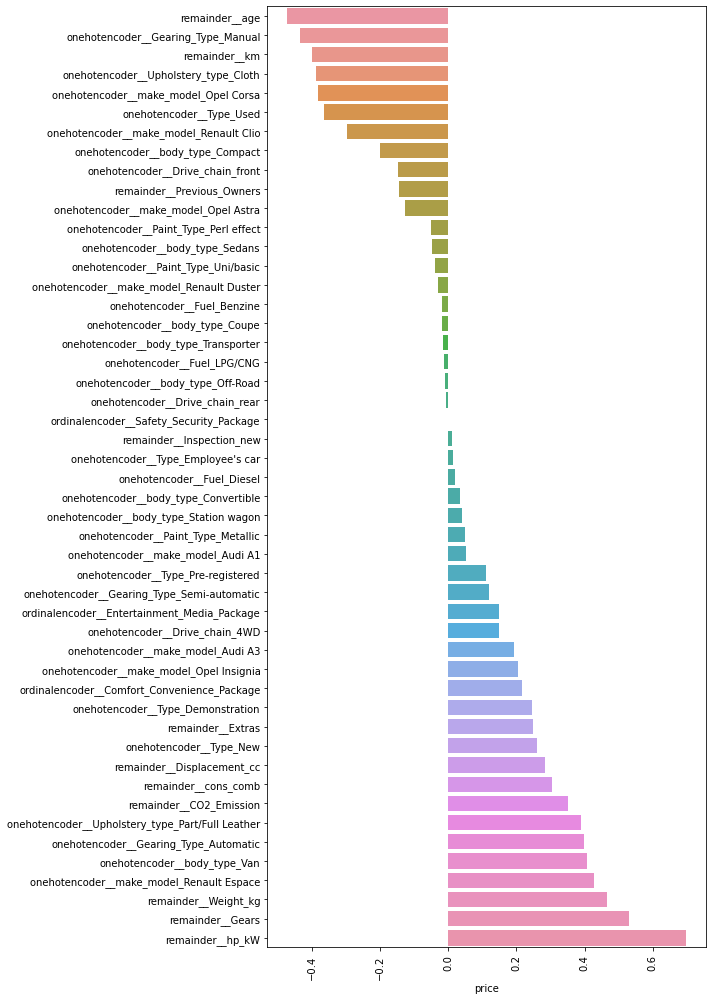

In [64]:
plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_price.index, x = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## LINEAR REGRESSION MODEL

#### Scaling

In [67]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# we choose 'MinMaxScaler' because we have OneHots. They are between 0-1. Other ones must be like this.

In [68]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [65]:
from sklearn.linear_model import LinearRegression

In [69]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [70]:
pd.options.display.float_format = '{:.3f}'.format

In [71]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.868       0.871
mae     1852.563    1854.484
mse  7228780.796 6879665.900
rmse    2688.639    2622.912

In [72]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [73]:
y_pred = lm.predict(X_test_scaled)

In [74]:
adj_r2(y_test, y_pred, X)

0.8705958784931118

### Cross Validation

In [75]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
             return_train_score=True)

# we refreshed the model before CV
# we choose negatife values in CV like 'neg_mean...'. because in this process does maximize our scores
# we dont want do be maximize our errors. check the logic

In [77]:
pd.DataFrame(scores)

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
0     0.012       0.002    0.862     0.868                     -1856.533   
1     0.014       0.001    0.865     0.868                     -1929.849   
2     0.013       0.001    0.869     0.868                     -1903.381   
3     0.012       0.001    0.857     0.869                     -1858.299   
4     0.012       0.001    0.858     0.869                     -1954.440   
5     0.011       0.001    0.876     0.867                     -1796.178   
6     0.011       0.001    0.873     0.867                     -1796.761   
7     0.011       0.001    0.871     0.867                     -1877.833   
8     0.013       0.001    0.867     0.868                     -1821.351   
9     0.012       0.001    0.865     0.868                     -1854.251   

   train_neg_mean_absolute_error  test_neg_mean_squared_error  \
0                      -1853.817                 -7436524.671   
1                      -1847.145                 -7635355.139   
2                      -1856.221                 -7141166.740   
3                      -1858.458                 -7868678.918   
4                      -1843.097                 -8631169.141   
5                      -1864.934                 -6809946.291   
6                      -1866.687                 -6280838.571   
7                      -1847.915                 -7422467.432   
8                      -1861.020                 -6965946.113   
9                      -1857.075                 -7078374.669   

   train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
0                  -7211171.902                         -2726.999   
1                  -7190152.596                         -2763.215   
2                  -7245205.070                         -2672.296   
3                  -7164068.431                         -2805.117   
4                  -7083731.386                         -2937.885   
5                  -7282100.937                         -2609.587   
6                  -7341492.680                         -2506.160   
7                  -7214516.828                         -2724.421   
8                  -7260110.827                         -2639.308   
9                  -7265884.994                         -2660.522   

   train_neg_root_mean_squared_error  
0                          -2685.363  
1                          -2681.446  
2                          -2691.692  
3                          -2676.578  
4                          -2661.528  
5                          -2698.537  
6                          -2709.519  
7                          -2685.985  
8                          -2694.459  
9                          -2695.531

In [76]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.866
train_r2                                   0.868
test_neg_mean_absolute_error           -1864.888
train_neg_mean_absolute_error          -1855.637
test_neg_mean_squared_error         -7327046.768
train_neg_mean_squared_error        -7225843.565
test_neg_root_mean_squared_error       -2704.551
train_neg_root_mean_squared_error      -2688.064
dtype: float64

In [78]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

# we checked train and validation scores with the above line

train        test
R2         0.868       0.871
mae     1852.563    1854.484
mse  7228780.796 6879665.900
rmse    2688.639    2622.912

In [79]:
2622/df.price.mean()

# our model makes an average of 14.5% errors for this rmse score

0.1455030414181288

### Prediction Error with Outliers

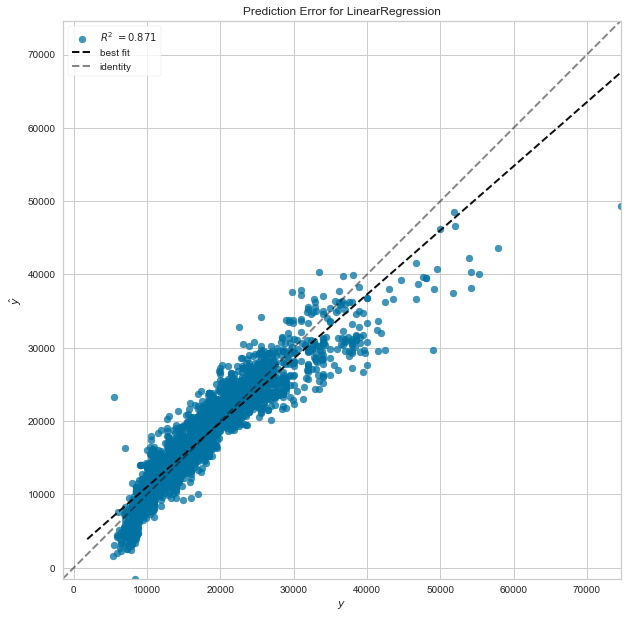

In [80]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

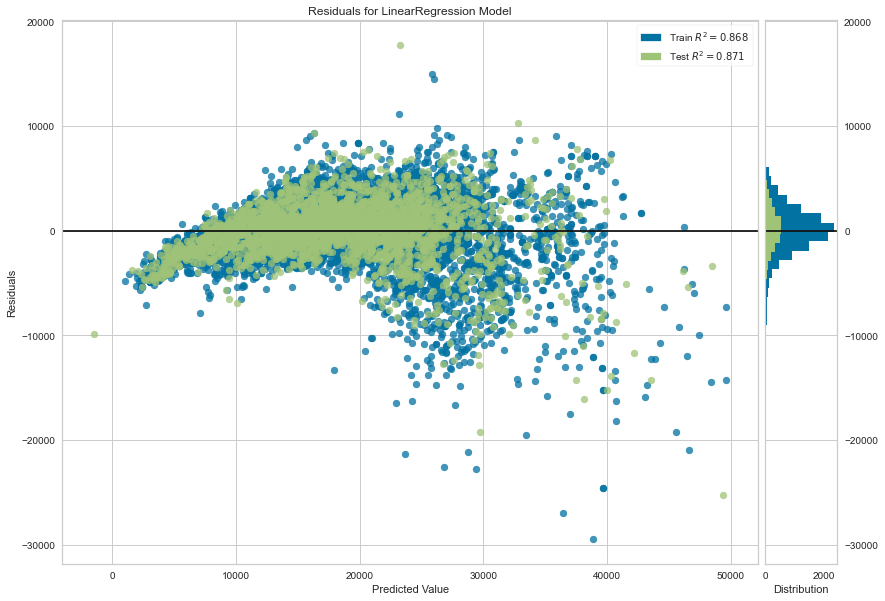

In [81]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();       

In [83]:
df2[df2["make_model"]== model]["price"]

14524    17500
14525    17950
14526    17950
14527    17990
14528    22600
         ...  
15488    39950
15489    39885
15490    39875
15491    39700
15492    40999
Name: price, Length: 969, dtype: int64

In [82]:
for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
    df2.reset_index(drop=True, inplace=True)
df2


# we droped outliers

make_model body_type  price        km            Type     Fuel  \
0             Audi A1    Sedans  15770 56013.000            Used   Diesel   
1             Audi A1    Sedans  14500 80000.000            Used  Benzine   
2             Audi A1    Sedans  14640 83450.000            Used   Diesel   
3             Audi A1    Sedans  14500 73000.000            Used   Diesel   
4             Audi A1    Sedans  16790 16200.000            Used   Diesel   
...               ...       ...    ...       ...             ...      ...   
15488  Renault Espace       Van  39950  1647.363             New   Diesel   
15489  Renault Espace       Van  39885  9900.000            Used  Benzine   
15490  Renault Espace       Van  39875    15.000  Pre-registered   Diesel   
15491  Renault Espace       Van  39700    10.000  Pre-registered   Diesel   
15492  Renault Espace       Van  40999  1647.363   Demonstration  Benzine   

       Extras  Gears   age  Previous_Owners   hp_kW  Inspection_new  \
0           3  7.000 3.000            2.000  66.000               1   
1           4  7.000 2.000            1.000 141.000               0   
2           2  7.000 3.000            1.000  85.000               0   
3           3  6.000 3.000            1.000  66.000               0   
4           4  7.000 3.000            1.000  66.000               1   
...       ...    ...   ...              ...     ...             ...   
15488       2  6.000 0.000            1.000 147.000               0   
15489       3  7.000 0.000            1.000 165.000               0   
15490       1  6.000 0.000            1.000 146.000               1   
15491       2  6.000 0.000            1.000 147.000               0   
15492       2  6.000 0.000            1.000 165.000               1   

      Paint_Type    Upholstery_type Gearing_Type  Displacement_cc  Weight_kg  \
0       Metallic              Cloth    Automatic         1422.000   1220.000   
1       Metallic              Cloth    Automatic         1798.000   1255.000   
2       Metallic              Cloth    Automatic         1598.000   1135.000   
3       Metallic              Cloth    Automatic         1422.000   1195.000   
4       Metallic              Cloth    Automatic         1422.000   1135.000   
...          ...                ...          ...              ...        ...   
15488   Metallic  Part/Full Leather    Automatic         1997.000   1758.000   
15489   Metallic              Cloth    Automatic         1798.000   1708.000   
15490   Metallic  Part/Full Leather    Automatic         1997.000   1734.000   
15491   Metallic  Part/Full Leather    Automatic         1997.000   1758.000   
15492   Metallic  Part/Full Leather    Automatic         1798.000   1685.000   

      Drive_chain  cons_comb  CO2_Emission Comfort_Convenience_Package  \
0           front      3.800        99.000                     Premium   
1           front      5.600       129.000                    Standard   
2           front      3.800        99.000                     Premium   
3           front      3.800        99.000                    Standard   
4           front      4.100       109.000                     Premium   
...           ...        ...           ...                         ...   
15488       front      5.300       139.000                     Premium   
15489       front      7.400       168.000                     Premium   
15490       front      5.300       139.000                    Standard   
15491       front      5.300       139.000                    Standard   
15492         4WD      6.800       153.000                    Standard   

      Entertainment_Media_Package Safety_Security_Package  
0                            Plus  Safety Premium Package  
1                            Plus  Safety Premium Package  
2                        Standard  Safety Premium Package  
3                            Plus  Safety Premium Package  
4                            Plus  Safety Premium Package  
...                    

In [84]:
df2.shape

(15493, 23)

In [85]:
df3 = df2.copy()

## without outliers

In [86]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [87]:
X_train= pd.DataFrame(column_trans.fit_transform(X_train), columns=features, index=X_train.index)
X_test= pd.DataFrame(column_trans.transform(X_test), columns=features, index=X_test.index)

In [88]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

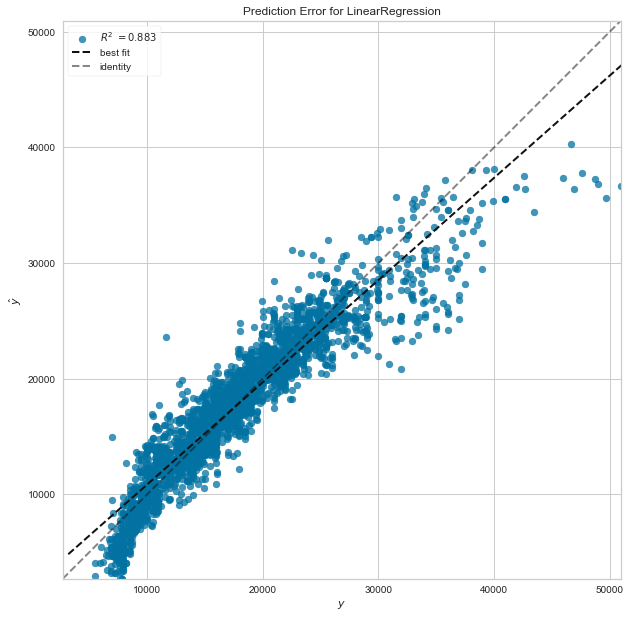

In [90]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();


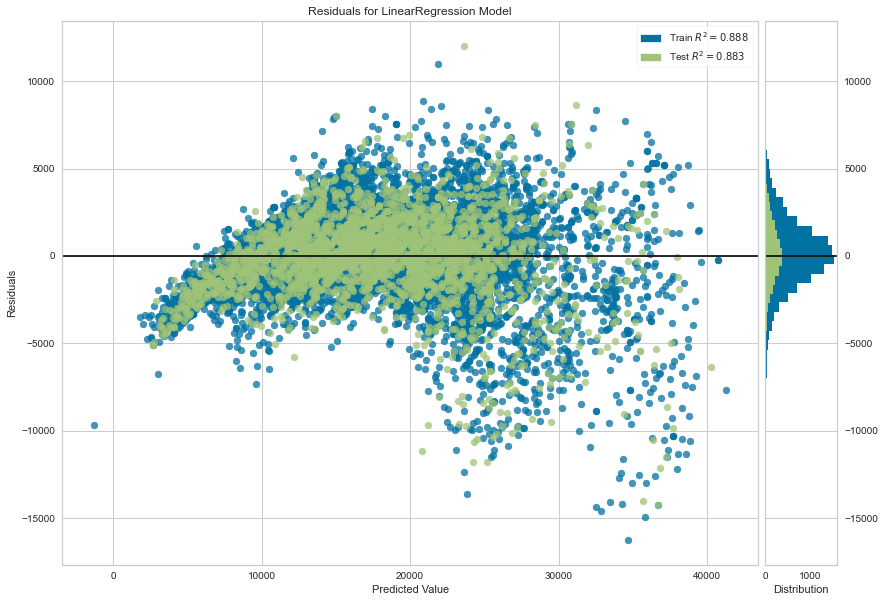

In [91]:
visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [92]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.888       0.883
mae     1630.601    1601.911
mse  5179967.179 5105200.460
rmse    2275.954    2259.469

Eval metrics with outliers

        train	     test
R2	    0.868	     0.871
mae	    1857.146	 1858.159
mse	    7229219.239	 6877350.088
rmse	2688.721	 2622.470

In [94]:
2260/df2.price.mean()

# %14 to %12

0.12856633284963626

In [95]:
model = LinearRegression() # normalize=True
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

# lets check overfittings for new dataset

In [96]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

test_r2  train_r2  test_neg_mean_absolute_error  \
1     0.877     0.889                     -1657.619   
2     0.888     0.888                     -1636.805   
3     0.893     0.887                     -1609.582   
4     0.888     0.888                     -1586.844   
5     0.886     0.888                     -1652.730   
6     0.893     0.888                     -1654.508   
7     0.888     0.888                     -1581.939   
8     0.879     0.888                     -1737.705   
9     0.887     0.888                     -1612.735   
10    0.888     0.888                     -1626.797   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1622.919                 -5301136.671   
2                       -1626.439                 -5379043.895   
3                       -1631.298                 -4876514.742   
4                       -1638.856                 -4877796.995   
5                       -1633.928                 -5404202.014   
6                       -1622.999                 -5308059.090   
7                       -1637.883                 -4940314.392   
8                       -1627.706                 -6103261.288   
9                       -1629.117                 -5069439.883   
10                      -1627.622                 -5069948.028   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -5170290.855                         -2302.420   
2                   -5149361.342                         -2319.277   
3                   -5220628.095                         -2208.283   
4                   -5215950.633                         -2208.574   
5                   -5171771.923                         -2324.694   
6                   -5157057.565                         -2303.923   
7                   -5205225.339                         -2222.682   
8                   -5125431.324                         -2470.478   
9                   -5188899.365                         -2251.542   
10                  -5189096.644                         -2251.655   

    train_neg_root_mean_squared_error  
1                           -2273.827  
2                           -2269.220  
3                           -2284.869  
4                           -2283.846  
5                           -2274.153  
6                           -2270.916  
7                           -2281.496  
8                           -2263.942  
9                           -2277.916  
10                          -2277.959

In [97]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1635.726
train_neg_mean_absolute_error          -1629.877
test_neg_mean_squared_error         -5232971.700
train_neg_mean_squared_error        -5179371.309
test_neg_root_mean_squared_error       -2286.353
train_neg_root_mean_squared_error      -2275.814
dtype: float64

In [98]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.888       0.883
mae     1630.601    1601.911
mse  5179967.179 5105200.460
rmse    2275.954    2259.469

In [99]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [100]:
lm2.coef_ 

array([-7.22875373e+15, -7.22875373e+15, -7.22875373e+15, -7.22875373e+15,
       -7.22875373e+15, -7.22875373e+15, -7.22875373e+15, -7.22875373e+15,
        5.03492210e+15,  5.03492210e+15,  5.03492210e+15,  5.03492210e+15,
        5.03492210e+15,  5.03492210e+15,  5.03492210e+15,  5.03492210e+15,
        2.11481381e+16,  2.11481381e+16,  2.11481381e+16,  2.11481381e+16,
        2.11481381e+16, -5.62153605e+15, -5.62153605e+15, -5.62153605e+15,
       -2.85783606e+16, -2.85783606e+16, -2.85783606e+16,  1.09292213e+15,
        1.09292213e+15,  4.79542977e+16,  4.79542977e+16,  4.79542977e+16,
       -1.19809464e+16, -1.19809464e+16, -1.19809464e+16,  1.15850000e+03,
       -1.10000000e+02,  2.42750000e+02, -1.08185000e+04,  5.90875000e+02,
        1.82675000e+03, -5.23450000e+03,  4.05734375e+02,  1.57665938e+04,
       -3.65000000e+01, -9.31250000e+02, -1.42250000e+03,  6.77250000e+02,
       -2.80275000e+03])

In [101]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"])

Coef
onehotencoder__make_model_Audi A1                 -7228753733642614.000
onehotencoder__make_model_Audi A3                 -7228753733641318.000
onehotencoder__make_model_Opel Astra              -7228753733646612.000
onehotencoder__make_model_Opel Corsa              -7228753733648258.000
onehotencoder__make_model_Opel Insignia           -7228753733643122.000
onehotencoder__make_model_Renault Clio            -7228753733648094.000
onehotencoder__make_model_Renault Duster          -7228753733651933.000
onehotencoder__make_model_Renault Espace          -7228753733637255.000
onehotencoder__body_type_Compact                   5034922104318458.000
onehotencoder__body_type_Convertible               5034922104316099.000
onehotencoder__body_type_Coupe                     5034922104317715.000
onehotencoder__body_type_Off-Road                  5034922104318760.000
onehotencoder__body_type_Sedans                    5034922104318629.000
onehotencoder__body_type_Station wagon             5034922104318720.000
onehotencoder__body_type_Transporter               5034922104317187.000
onehotencoder__body_type_Van                       5034922104319821.000
onehotencoder__Type_Demonstration                 21148138083147252.000
onehotencoder__Type_Employee's car                21148138083143632.000
onehotencoder__Type_New                           21148138083145504.000
onehotencoder__Type_Pre-registered                21148138083144584.000
onehotencoder__Type_Used                          21148138083144104.000
onehotencoder__Fuel_Benzine                       -5621536050190752.000
onehotencoder__Fuel_Diesel                        -5621536050190070.000
onehotencoder__Fuel_LPG/CNG                       -5621536050190164.000
onehotencoder__Paint_Type_Metallic               -28578360621122492.000
onehotencoder__Paint_Type_Perl effect            -28578360621120252.000
onehotencoder__Paint_Type_Uni/basic              -28578360621122416.000
onehotencoder__Upholstery_type_Cloth               1092922134984662.500
onehotencoder__Upholstery_type_Part/Full Leather   1092922134985243.750
onehotencoder__Gearing_Type_Automatic             47954297669261208.000
onehotencoder__Gearing_Type_Manual                47954297669259464.000
onehotencoder__Gearing_Type_Semi-automatic        47954297669262840.000
onehotencoder__Drive_chain_4WD                   -11980946352116268.000
onehotencoder__Drive_chain_front                 -11980946352118690.000
onehotencoder__Drive_chain_rear                  -11980946352120250.000
ordinalencoder__Comfort_Convenience_Package                    1158.500
ordinalencoder__Entertainment_Media_Package                    -110.000
ordinalencoder__Safety_Security_Package                         242.750
remainder__km                                                -10818.500
remainder__Extras                                               590.875
remainder__Gears                                               1826.750
remainder__age                                                -5234.500
remainder__Previous_Owners                                      405.734
remainder__hp_kW                                              15766.594
remainder__Inspection_new                                       -36.500
remainder__Displacement_cc                                     -931.250
remainder__Weight_kg                                          -1422.500
remainder__cons_comb                                            677.250
remainder__CO2_Emission                                       -2802.750

#### Pipeline

In [102]:
df2.head() # without outliers

make_model body_type  price        km  Type     Fuel  Extras  Gears   age  \
0    Audi A1    Sedans  15770 56013.000  Used   Diesel       3  7.000 3.000   
1    Audi A1    Sedans  14500 80000.000  Used  Benzine       4  7.000 2.000   
2    Audi A1    Sedans  14640 83450.000  Used   Diesel       2  7.000 3.000   
3    Audi A1    Sedans  14500 73000.000  Used   Diesel       3  6.000 3.000   
4    Audi A1    Sedans  16790 16200.000  Used   Diesel       4  7.000 3.000   

   Previous_Owners   hp_kW  Inspection_new Paint_Type Upholstery_type  \
0            2.000  66.000               1   Metallic           Cloth   
1            1.000 141.000               0   Metallic           Cloth   
2            1.000  85.000               0   Metallic           Cloth   
3            1.000  66.000               0   Metallic           Cloth   
4            1.000  66.000               1   Metallic           Cloth   

  Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  \
0    Automatic         1422.000   1220.000       front      3.800   
1    Automatic         1798.000   1255.000       front      5.600   
2    Automatic         1598.000   1135.000       front      3.800   
3    Automatic         1422.000   1195.000       front      3.800   
4    Automatic         1422.000   1135.000       front      4.100   

   CO2_Emission Comfort_Convenience_Package Entertainment_Media_Package  \
0        99.000                     Premium                        Plus   
1       129.000                    Standard                        Plus   
2        99.000                     Premium                    Standard   
3        99.000                    Standard                        Plus   
4       109.000                     Premium                        Plus   

  Safety_Security_Package  
0  Safety Premium Package  
1  Safety Premium Package  
2  Safety Premium Package  
3  Safety Premium Package  
4  Safety Premium Package

In [103]:
X = df2.drop(columns = ["price"])
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# after drop

In [104]:
X_train.head()

make_model      body_type        km            Type     Fuel  \
5818      Opel Astra  Station wagon 66535.000            Used   Diesel   
12640  Opel Insignia         Sedans  8650.000            Used  Benzine   
4447         Audi A3         Sedans  3000.000            Used  Benzine   
6061      Opel Astra  Station wagon 89738.000            Used  Benzine   
9991      Opel Corsa         Sedans    50.000  Pre-registered  Benzine   

       Extras  Gears   age  Previous_Owners   hp_kW  Inspection_new  \
5818        2  6.000 2.000            2.000 100.000               1   
12640       2  6.000 0.000            1.000 121.000               0   
4447        1  7.000 1.000            1.000  85.000               0   
6061        4  6.000 3.000            2.000 103.000               0   
9991        3  5.000 0.000            1.000  51.000               0   

      Paint_Type    Upholstery_type Gearing_Type  Displacement_cc  Weight_kg  \
5818    Metallic              Cloth    Automatic         1598.000   1550.000   
12640   Metallic  Part/Full Leather       Manual         1490.000   1503.000   
4447   Uni/basic              Cloth    Automatic          999.000   1275.000   
6061    Metallic              Cloth       Manual         1364.000   1425.000   
9991    Metallic              Cloth       Manual         1229.000   1163.000   

      Drive_chain  cons_comb  CO2_Emission Comfort_Convenience_Package  \
5818        front      4.500       119.000                     Premium   
12640       front      6.000       136.000                     Premium   
4447        front      5.100       117.000                    Standard   
6061        front      5.600       133.000                    Standard   
9991        front      5.300       124.000                    Standard   

      Entertainment_Media_Package Safety_Security_Package  
5818                         Plus  Safety Premium Package  
12640                        Plus  Safety Premium Package  
4447                         Plus  Safety Premium Package  
6061                     Standard  Safety Premium Package  
9991                         Plus  Safety Premium Package

What happens can be described as follows:

The data are split into TRAINING data and TEST data according to ratio of train_test_split

fit process:
Step 1: the onehotencoder is fitted on the categoric features in cat_onehot list for TRAINING data
Step 2: the onehotencoder transforms the categoric features in cat_onehot list for TRAINING data
step 3: the ordinalencoder is fitted on the categoric features in cat_ordinal list for TRAINING data
Step 4: the ordinalencoder transforms the categoric features in cat_ordinal list for TRAINING data
step 5: the numeric features of TRAINING data are left as they are
Step 6: the minmaxscaler is fitted on all features of transformed TRAINING data
Step 7: the minmaxscaler transforms all features of transformed TRAINING data
Step 8: the models are fitted/trained using the scaled and transformed TRAINING data

predict process:
Step 1: the onehotencoder transforms the categoric features in cat_onehot list of TEST data according to TRAINING data
Step 2: the ordinalencoder transforms the categoric features in cat_ordinal list of TEST data according to TRAINING data
step 3: the numeric features of TRAINING data are left as they are
Step 4: the minmaxscaler transforms all features of TEST data according to TRAINING data
Step 5: the trained models predict using the scaled and transformed TEST data


pipe_model.fit(X_train, y_train) --> columns_trans.fit_transform(X_train) --> Lasso.fit(X_train_trans, y_train)
pipe_model.predict(X_test)       --> columns_trans.transform(X_test)      --> Lasso.predict(X_test_trans)

pipeline automates the process

In [105]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [107]:
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                       remainder='passthrough')

In [108]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [109]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations)

ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [110]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [111]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

train        test
R2         0.888       0.884
mae     1627.573    1597.596
mse  5169904.474 5092455.314
rmse    2273.742    2256.647

In [112]:
## Cross Validate

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [113]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1633.824
train_neg_mean_absolute_error          -1627.370
test_neg_mean_squared_error         -5219722.126
train_neg_mean_squared_error        -5167461.404
test_neg_root_mean_squared_error       -2283.511
train_neg_root_mean_squared_error      -2273.190
dtype: float64

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [116]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # Parametre isimleri pipeline da tanımlanan model ismi ile birlikte kullanılmalıdır.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [117]:
pipe_model.get_params() 

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['make_model', 'body_type', 'Type', 'Fuel',
                                     'Paint_Type', 'Upholstery_type',
                                     'Gearing_Type', 'Drive_chain']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Standard',
                                                                'Premium',
                                                                'Premium Plus'],
                                                               ['Standard',
                                                                'Plus'],
                                                   

In [118]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [119]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=1.02))])

In [120]:
ridge_grid_model.best_params_

{'Ridge__alpha': 1.02}

In [121]:
pd.DataFrame(ridge_grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.134         0.006            0.011           0.000   
1           0.086         0.024            0.012           0.002   
2           0.090         0.005            0.015           0.003   
3           0.105         0.012            0.015           0.003   
4           0.092         0.012            0.016           0.007   
5           0.101         0.009            0.015           0.003   
6           0.093         0.011            0.014           0.004   
7           0.103         0.016            0.017           0.004   
8           0.113         0.016            0.017           0.007   
9           0.097         0.009            0.014           0.002   
10          0.087         0.009            0.014           0.005   
11          0.110         0.017            0.016           0.004   
12          0.106         0.009            0.015           0.005   
13          0.096         0.010            0.015           0.003   
14          0.101         0.013            0.014           0.003   
15          0.115         0.018            0.015           0.005   
16          0.108         0.018            0.014           0.001   
17          0.094         0.006            0.014           0.002   
18          0.093         0.010            0.015           0.002   
19          0.093         0.007            0.015           0.002   
20          0.104         0.010            0.018           0.008   
21          0.108         0.018            0.015           0.004   
22          0.102         0.009            0.014           0.003   
23          0.099         0.007            0.014           0.002   
24          0.102         0.015            0.017           0.007   
25          0.103         0.018            0.013           0.001   
26          0.102         0.013            0.015           0.003   
27          0.094         0.007            0.016           0.008   
28          0.091         0.007            0.015           0.004   
29          0.088         0.006            0.016           0.006   
30          0.096         0.010            0.015           0.005   
31          0.104         0.014            0.015           0.005   
32          0.093         0.011            0.018           0.008   
33          0.091         0.008            0.014           0.003   
34          0.099         0.010            0.015           0.003   
35          0.106         0.012            0.012           0.001   
36          0.102         0.016            0.013           0.002   
37          0.099         0.009            0.014           0.001   
38          0.093         0.010            0.013           0.001   
39          0.090         0.006            0.015           0.005   
40          0.092         0.007            0.014           0.001   
41          0.094         0.007            0.013           0.002   
42          0.094         0.012            0.013           0.002   
43          0.094         0.009            0.013           0.001   
44          0.081         0.004            0.013           0.002   
45          0.089         0.007            0.013           0.002   
46          0.091         0.008            0.012           0.001   
47          0.090         0.009            0.013           0.001   
48          0.103         0.010            0.014           0.002   
49          0.114         0.018            0.017           0.005   
50          0.101         0.011            0.014           0.004   
51          0.096         0.006            0.015           0.004   
52          0.095         0.007            0.013           0.001   
53          0.096         0.009            0.014           0.002   
54          0.088         0.007            0.014           0.002   
55          0.097         0.008            0.015           0.004   
56          0.107         0.015            0.017           0.006   
57          0.106         0.017            0.020           0

In [122]:
ridge_grid_model.best_index_

1

In [123]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2283.515
mean_train_score   -2273.203
Name: 1, dtype: object

In [124]:
ridge_grid_model.best_score_

-2283.515064696283

In [125]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

train        test
R2         0.888       0.884
mae     1627.568    1597.590
mse  5169954.570 5092452.496
rmse    2273.753    2256.646

In [126]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [127]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge(alpha=1.02))]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=1.02))])

In [128]:
ridge_model["Ridge"].coef_ 

array([  2258.68981639,   3532.37889553,  -1679.43171009,  -3358.40977761,
         1748.85931969,  -3254.71794016,  -6815.54238094,   7568.17377784,
          209.00769813,  -1889.74201624,   -403.2366133 ,    383.48555302,
          368.94657852,    530.53720129,   -903.63038156,   1704.63198215,
         1969.98483769,  -1142.19212057,    536.64138339,   -451.56305581,
         -912.87104432,   -420.78585359,    186.66579675,    234.12005538,
         -794.52733136,   1425.4766962 ,   -630.94936509,   -306.45203112,
          306.45203111,     35.5273212 ,  -1697.53783884,   1662.0105193 ,
         1957.65003319,   -379.94515948,  -1577.7048739 ,   1145.93983609,
         -104.94912815,    258.25669405, -10603.88949057,    607.29849227,
         1860.95217183,  -5275.98489387,    449.43562798,  15207.69639264,
          -48.1713672 ,   -659.02474211,  -1319.01683927,    567.00240083,
        -2484.05410128])

In [129]:
ridge_model["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['onehotencoder__make_model_Audi A1',
       'onehotencoder__make_model_Audi A3',
       'onehotencoder__make_model_Opel Astra',
       'onehotencoder__make_model_Opel Corsa',
       'onehotencoder__make_model_Opel Insignia',
       'onehotencoder__make_model_Renault Clio',
       'onehotencoder__make_model_Renault Duster',
       'onehotencoder__make_model_Renault Espace',
       'onehotencoder__body_type_Compact',
       'onehotencoder__body_type_Convertible',
       'onehotencoder__body_type_Coupe',
       'onehotencoder__body_type_Off-Road',
       'onehotencoder__body_type_Sedans',
       'onehotencoder__body_type_Station wagon',
       'onehotencoder__body_type_Transporter',
       'onehotencoder__body_type_Van',
       'onehotencoder__Type_Demonstration',
       "onehotencoder__Type_Employee's car", 'onehotencoder__Type_New',
       'onehotencoder__Type_Pre-registered', 'onehotencoder__Type_Used',
       'onehotencoder__Fuel_Benzine', 'onehotencoder__Fuel_Diesel',
       '

In [130]:
pd.DataFrame(ridge_model["Ridge"].coef_, index = ridge_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

Coef
remainder__km                                    -10603.889
onehotencoder__make_model_Renault Duster          -6815.542
remainder__age                                    -5275.985
onehotencoder__make_model_Opel Corsa              -3358.410
onehotencoder__make_model_Renault Clio            -3254.718
remainder__CO2_Emission                           -2484.054
onehotencoder__body_type_Convertible              -1889.742
onehotencoder__Gearing_Type_Manual                -1697.538
onehotencoder__make_model_Opel Astra              -1679.432
onehotencoder__Drive_chain_rear                   -1577.705
remainder__Weight_kg                              -1319.017
onehotencoder__Type_Employee's car                -1142.192
onehotencoder__Type_Used                           -912.871
onehotencoder__body_type_Transporter               -903.630
onehotencoder__Paint_Type_Metallic                 -794.527
remainder__Displacement_cc                         -659.025
onehotencoder__Paint_Type_Uni/basic                -630.949
onehotencoder__Type_Pre-registered                 -451.563
onehotencoder__Fuel_Benzine                        -420.786
onehotencoder__body_type_Coupe                     -403.237
onehotencoder__Drive_chain_front                   -379.945
onehotencoder__Upholstery_type_Cloth               -306.452
ordinalencoder__Entertainment_Media_Package        -104.949
remainder__Inspection_new                           -48.171
onehotencoder__Gearing_Type_Automatic                35.527
onehotencoder__Fuel_Diesel                          186.666
onehotencoder__body_type_Compact                    209.008
onehotencoder__Fuel_LPG/CNG                         234.120
ordinalencoder__Safety_Security_Package             258.257
onehotencoder__Upholstery_type_Part/Full Leather    306.452
onehotencoder__body_type_Sedans                     368.947
onehotencoder__body_type_Off-Road                   383.486
remainder__Previous_Owners                          449.436
onehotencoder__body_type_Station wagon              530.537
onehotencoder__Type_New                             536.641
remainder__cons_comb                                567.002
remainder__Extras                                   607.298
ordinalencoder__Comfort_Convenience_Package        1145.940
onehotencoder__Paint_Type_Perl effect              1425.477
onehotencoder__Gearing_Type_Semi-automatic         1662.011
onehotencoder__body_type_Van                       1704.632
onehotencoder__make_model_Opel Insignia            1748.859
remainder__Gears                                   1860.952
onehotencoder__Drive_chain_4WD                     1957.650
onehotencoder__Type_Demonstration                  1969.985
onehotencoder__make_model_Audi A1                  2258.690
onehotencoder__make_model_Audi A3                  3532.379
onehotencoder__make_model_Renault Espace           7568.174
remainder__hp_kW                                  15207.696

### Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [131]:
from sklearn.linear_model import Lasso

In [132]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [133]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

train        test
R2         0.888       0.884
mae     1629.119    1596.424
mse  5177208.946 5085246.452
rmse    2275.348    2255.049

In [134]:
# Cross Validate

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [135]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1634.322
train_neg_mean_absolute_error          -1628.847
test_neg_mean_squared_error         -5216126.030
train_neg_mean_squared_error        -5174321.986
test_neg_root_mean_squared_error       -2282.698
train_neg_root_mean_squared_error      -2274.698
dtype: float64

In [136]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]
model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}  # Parametre names must be same like how is it in pipeline

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [137]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [138]:
lasso_grid_model.best_params_

{'Lasso__alpha': 1.02}

In [139]:
pd.DataFrame(lasso_grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           2.380         0.181            0.021           0.009   
1           0.658         0.207            0.017           0.004   
2           0.237         0.031            0.015           0.003   
3           0.170         0.015            0.016           0.005   
4           0.178         0.017            0.015           0.002   
5           0.153         0.009            0.013           0.002   
6           0.129         0.005            0.014           0.002   
7           0.118         0.009            0.014           0.001   
8           0.126         0.008            0.013           0.002   
9           0.116         0.006            0.014           0.002   
10          0.124         0.012            0.014           0.004   
11          0.120         0.012            0.014           0.003   
12          0.145         0.035            0.015           0.005   
13          0.161         0.046            0.013           0.003   
14          0.177         0.032            0.013           0.001   
15          0.275         0.071            0.015           0.003   
16          0.309         0.072            0.015           0.003   
17          0.259         0.053            0.015           0.003   
18          0.187         0.031            0.016           0.005   
19          0.173         0.019            0.012           0.001   
20          0.183         0.027            0.016           0.003   
21          0.172         0.012            0.016           0.005   
22          0.165         0.022            0.015           0.003   
23          0.173         0.020            0.018           0.004   
24          0.167         0.017            0.015           0.003   
25          0.155         0.014            0.015           0.004   
26          0.184         0.034            0.020           0.008   
27          0.165         0.023            0.015           0.005   
28          0.136         0.012            0.014           0.002   
29          0.127         0.011            0.014           0.002   
30          0.137         0.013            0.015           0.003   
31          0.129         0.011            0.013           0.002   
32          0.133         0.011            0.013           0.002   
33          0.122         0.012            0.014           0.003   
34          0.116         0.005            0.015           0.002   
35          0.137         0.013            0.017           0.008   
36          0.174         0.019            0.019           0.010   
37          0.159         0.016            0.013           0.002   
38          0.152         0.026            0.015           0.002   
39          0.138         0.014            0.015           0.001   
40          0.113         0.009            0.014           0.002   
41          0.125         0.013            0.015           0.004   
42          0.141         0.011            0.016           0.004   
43          0.142         0.018            0.017           0.005   
44          0.136         0.013            0.018           0.004   
45          0.134         0.011            0.015           0.001   
46          0.128         0.007            0.015           0.003   
47          0.130         0.008            0.016           0.003   
48          0.135         0.013            0.018           0.005   
49          0.151         0.019            0.018           0.005   
50          0.134         0.017            0.015           0.002   
51          0.109         0.007            0.014           0.002   
52          0.117         0.015            0.014           0.002   
53          0.116         0.007            0.015           0.003   
54          0.112         0.010            0.014           0.001   
55          0.109         0.013            0.013           0.001   
56          0.121         0.010            0.016           0.004   
57          0.116         0.014            0.014           0

In [140]:
lasso_grid_model.best_index_

1

In [141]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2282.711
mean_train_score   -2274.750
Name: 1, dtype: object

In [142]:
lasso_grid_model.best_score_

-2282.7105441558137

In [143]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

train        test
R2         0.888       0.884
mae     1629.137    1596.409
mse  5177409.984 5085291.420
rmse    2275.392    2255.059

In [144]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [145]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [146]:
pd.DataFrame(lasso_model["Lasso"].coef_, index = lasso_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

Coef
remainder__km                                    -10580.701
onehotencoder__make_model_Renault Duster          -6821.054
remainder__age                                    -5263.686
onehotencoder__make_model_Opel Corsa              -3554.909
onehotencoder__make_model_Renault Clio            -3396.189
onehotencoder__make_model_Opel Astra              -1880.020
onehotencoder__Gearing_Type_Manual                -1728.303
remainder__CO2_Emission                           -1499.373
remainder__Weight_kg                              -1034.395
onehotencoder__body_type_Transporter               -930.121
onehotencoder__Type_Employee's car                 -671.324
onehotencoder__Upholstery_type_Cloth               -610.731
onehotencoder__Fuel_Benzine                        -522.269
remainder__Displacement_cc                         -489.568
onehotencoder__Type_Used                           -465.484
onehotencoder__Paint_Type_Metallic                 -149.888
ordinalencoder__Entertainment_Media_Package         -90.767
remainder__Inspection_new                           -43.062
onehotencoder__body_type_Compact                      0.000
onehotencoder__Drive_chain_rear                      -0.000
onehotencoder__Drive_chain_front                     -0.000
onehotencoder__body_type_Convertible                 -0.000
onehotencoder__Upholstery_type_Part/Full Leather      0.000
onehotencoder__body_type_Coupe                       -0.000
onehotencoder__Paint_Type_Uni/basic                  -0.000
onehotencoder__Gearing_Type_Automatic                 0.000
remainder__cons_comb                                 -0.000
onehotencoder__body_type_Off-Road                    -0.000
onehotencoder__Type_Pre-registered                    0.000
onehotencoder__Fuel_LPG/CNG                           0.000
onehotencoder__Fuel_Diesel                            0.000
onehotencoder__body_type_Sedans                     167.090
ordinalencoder__Safety_Security_Package             195.802
onehotencoder__body_type_Station wagon              314.276
remainder__Previous_Owners                          315.321
remainder__Extras                                   563.164
onehotencoder__Type_New                             972.228
ordinalencoder__Comfort_Convenience_Package        1127.840
onehotencoder__make_model_Opel Insignia            1479.168
onehotencoder__body_type_Van                       1482.459
onehotencoder__Gearing_Type_Semi-automatic         1570.072
onehotencoder__Paint_Type_Perl effect              1682.817
remainder__Gears                                   1847.216
onehotencoder__make_model_Audi A1                  2100.288
onehotencoder__Drive_chain_4WD                     2167.115
onehotencoder__Type_Demonstration                  2405.059
onehotencoder__make_model_Audi A3                  3324.458
onehotencoder__make_model_Renault Espace           7286.171
remainder__hp_kW                                  15179.950

### Implement Elastic Net


- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [147]:
from sklearn.linear_model import ElasticNet

In [148]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [149]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

train         test
R2          0.508        0.505
mae      3671.788     3559.718
mse  22739690.270 21651490.137
rmse     4768.615     4653.116

In [150]:
## Cross Validate

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [151]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     0.508
train_r2                                    0.509
test_neg_mean_absolute_error            -3671.517
train_neg_mean_absolute_error           -3669.248
test_neg_mean_squared_error         -22737008.635
train_neg_mean_squared_error        -22704157.757
test_neg_root_mean_squared_error        -4766.857
train_neg_root_mean_squared_error       -4764.876
dtype: float64

In [152]:
## Finding best alpha and l1_ratio for ElasticNet

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [153]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
                                                                                                     'Premium '
                                                                                                     'Plus '
                                                                                                     'Package']]),
                                                                         ['Comfort_Convenience_Package',
                                                                          'Entertainment_Media_Package',
                                                                          'Safety_Security_Package'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [154]:
elastic_grid_model.best_params_

{'ElasticNet__alpha': 1.02, 'ElasticNet__l1_ratio': 1}

In [155]:
elastic_grid_model.best_index_

5

In [156]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[5, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2282.711
mean_train_score   -2274.750
Name: 5, dtype: object

In [157]:
elastic_grid_model.best_score_

-2282.7105441558137

In [158]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

train        test
R2         0.888       0.884
mae     1629.137    1596.409
mse  5177409.984 5085291.420
rmse    2275.392    2255.059

In [159]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

##### Feature Importance

In [160]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [161]:
df_feat_imp = pd.DataFrame(model["Lasso"].coef_, index = model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

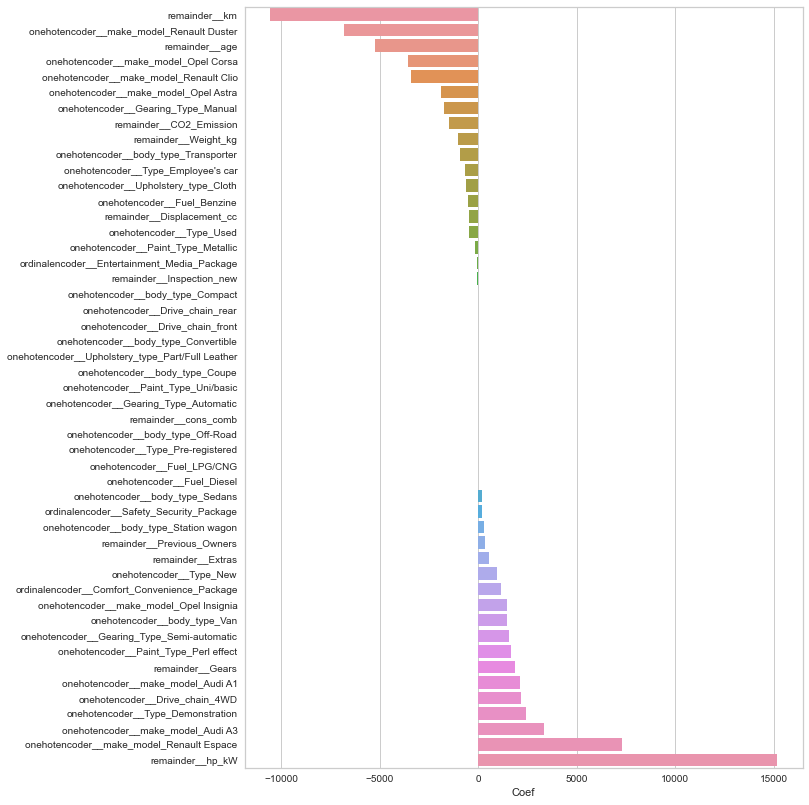

In [162]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp, x=df_feat_imp.Coef, y=df_feat_imp.index);

In [163]:
from yellowbrick.model_selection import FeatureImportances

# when u use pipeline check feature importance with yellowbrick

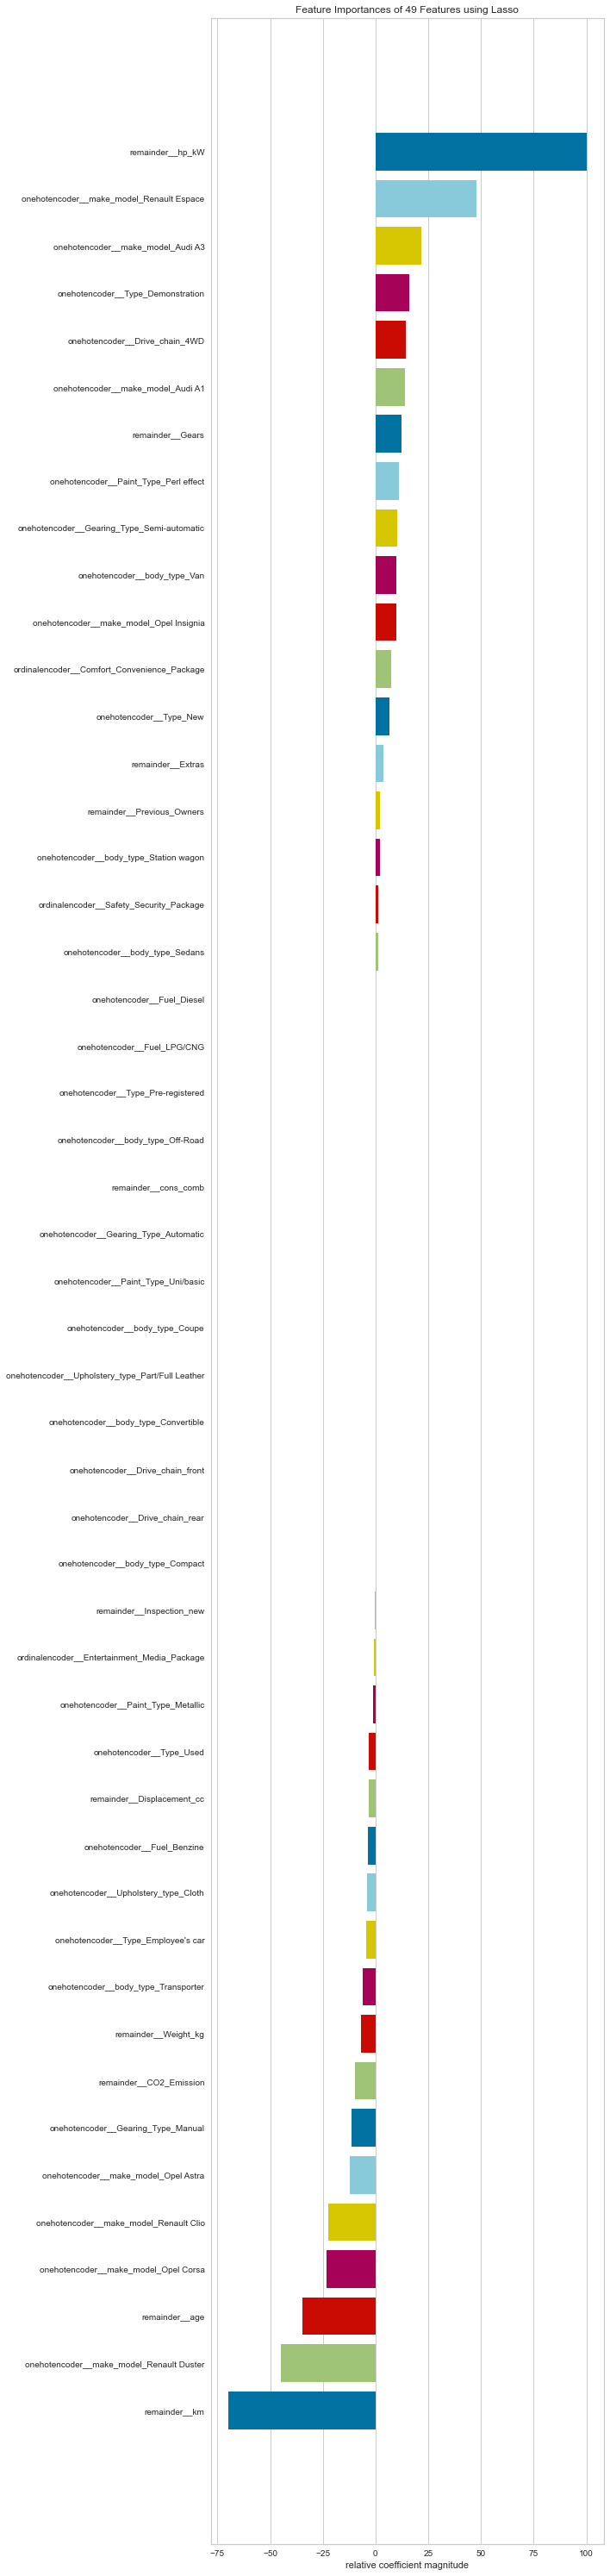

In [164]:
X_train_trans= column_trans.fit_transform(X_train)
X_train_scaled= scaler.fit_transform(X_train_trans)
model = Lasso(alpha=1.02)

viz = FeatureImportances(model, labels=column_trans.get_feature_names_out())
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# we will do feature selection. for this reason we 'll use lasso model

In [166]:
df_new = df2[["make_model", "hp_kW", "km","age", "Gearing_Type", "Gears", "Type", 'Safety_Security_Package', "price"]]

df_new

make_model   hp_kW        km   age Gearing_Type  Gears  \
0             Audi A1  66.000 56013.000 3.000    Automatic  7.000   
1             Audi A1 141.000 80000.000 2.000    Automatic  7.000   
2             Audi A1  85.000 83450.000 3.000    Automatic  7.000   
3             Audi A1  66.000 73000.000 3.000    Automatic  6.000   
4             Audi A1  66.000 16200.000 3.000    Automatic  7.000   
...               ...     ...       ...   ...          ...    ...   
15488  Renault Espace 147.000  1647.363 0.000    Automatic  6.000   
15489  Renault Espace 165.000  9900.000 0.000    Automatic  7.000   
15490  Renault Espace 146.000    15.000 0.000    Automatic  6.000   
15491  Renault Espace 147.000    10.000 0.000    Automatic  6.000   
15492  Renault Espace 165.000  1647.363 0.000    Automatic  6.000   

                 Type Safety_Security_Package  price  
0                Used  Safety Premium Package  15770  
1                Used  Safety Premium Package  14500  
2                Used  Safety Premium Package  14640  
3                Used  Safety Premium Package  14500  
4                Used  Safety Premium Package  16790  
...               ...                     ...    ...  
15488             New  Safety Premium Package  39950  
15489            Used  Safety Premium Package  39885  
15490  Pre-registered  Safety Premium Package  39875  
15491  Pre-registered  Safety Premium Package  39700  
15492   Demonstration  Safety Premium Package  40999  

[15493 rows x 9 columns]

In [167]:
# everything again

X = df_new.drop(columns = ["price"])
y = df_new.price

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [169]:
X_train.head()

make_model   hp_kW        km   age Gearing_Type  Gears  \
5818      Opel Astra 100.000 66535.000 2.000    Automatic  6.000   
12640  Opel Insignia 121.000  8650.000 0.000       Manual  6.000   
4447         Audi A3  85.000  3000.000 1.000    Automatic  7.000   
6061      Opel Astra 103.000 89738.000 3.000       Manual  6.000   
9991      Opel Corsa  51.000    50.000 0.000       Manual  5.000   

                 Type Safety_Security_Package  
5818             Used  Safety Premium Package  
12640            Used  Safety Premium Package  
4447             Used  Safety Premium Package  
6061             Used  Safety Premium Package  
9991   Pre-registered  Safety Premium Package

In [170]:
cat_onehot = ['make_model', 'Type', 'Gearing_Type']
cat_ordinal = ['Safety_Security_Package']

Safety_Security_Package = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']
    
categories = [Safety_Security_Package]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories=categories), cat_ordinal),
                                       remainder='passthrough')

In [171]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)

train_val(lasso_final_model, X_train, y_train, X_test, y_test)

train        test
R2         0.882       0.879
mae     1656.817    1619.918
mse  5470129.665 5304445.257
rmse    2338.831    2303.138

In [172]:
## Cross Validate

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [173]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.881
train_r2                                   0.882
test_neg_mean_absolute_error           -1659.164
train_neg_mean_absolute_error          -1656.716
test_neg_mean_squared_error         -5489269.264
train_neg_mean_squared_error        -5469107.920
test_neg_root_mean_squared_error       -2341.656
train_neg_root_mean_squared_error      -2338.596
dtype: float64

In [174]:
2303/df_new.price.mean()

0.13101250643925322

In [175]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#### Visually Compare Models Performance In a Graph

In [176]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

r2_score      mae     rmse
linear_m      0.883 1601.911 2259.469
ridge_m       0.884 1597.590 2256.646
lasso_m       0.884 1596.409 2255.059
elastic_m     0.884 1596.409 2255.059
final_m       0.879 1619.918 2303.138

In [177]:
compare = scores.sort_values(by="r2_score", ascending=False)
compare

r2_score      mae     rmse
lasso_m       0.884 1596.409 2255.059
elastic_m     0.884 1596.409 2255.059
ridge_m       0.884 1597.590 2256.646
linear_m      0.883 1601.911 2259.469
final_m       0.879 1619.918 2303.138

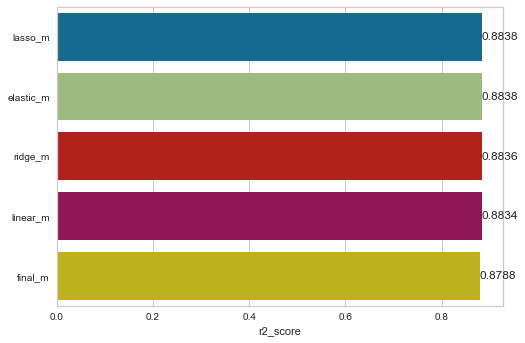

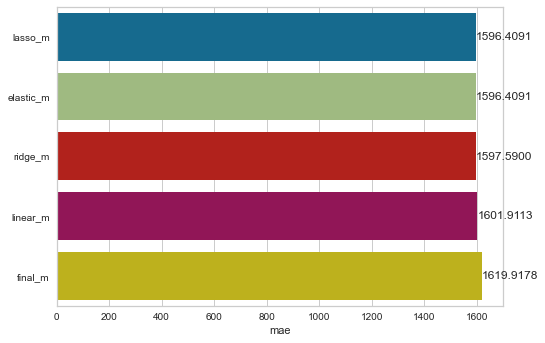

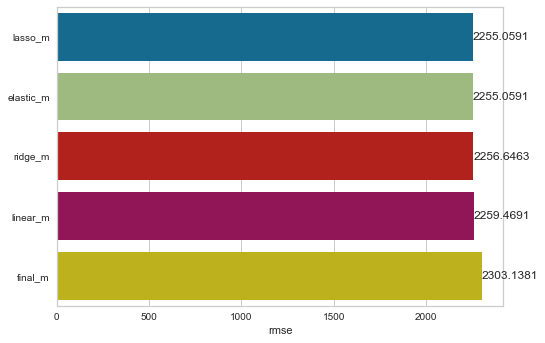

In [178]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # eğer metricimiz r2_score ise barplot büyükten küçüğe sıralanacak
    else:
        ascending = True # eğer metricimiz mae veya rmse ise barplot küçükten büyüğe sıralanacak
    compare = scores.sort_values(by=j, ascending=ascending) # ilgili metrice göre compare df'i yeniden sıralandırılıyor
    ax = sns.barplot(x = compare[j] , y= compare.index) # compare df'den compare[j] ile ilgili metric scorları sıralı
                                                        # bir şekilde çekiliyor ve barplotta görselleştiriliyor.
                                                        # y=compare.index, görselimizin y ekseninde model isimleri yazacak.
    ax.bar_label(ax.containers[0], fmt="%.4f"); # annotate "."dan 4 rakam gelecek şekilde düzenleniyor.

## Prediction new observation

In [179]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [180]:
X.head()

make_model   hp_kW        km   age Gearing_Type  Gears  Type  \
0    Audi A1  66.000 56013.000 3.000    Automatic  7.000  Used   
1    Audi A1 141.000 80000.000 2.000    Automatic  7.000  Used   
2    Audi A1  85.000 83450.000 3.000    Automatic  7.000  Used   
3    Audi A1  66.000 73000.000 3.000    Automatic  6.000  Used   
4    Audi A1  66.000 16200.000 3.000    Automatic  7.000  Used   

  Safety_Security_Package  
0  Safety Premium Package  
1  Safety Premium Package  
2  Safety Premium Package  
3  Safety Premium Package  
4  Safety Premium Package

In [181]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
final_model = Pipeline(steps=operations)

In [182]:
final_model.fit(X, y)

## we used ALL data here

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [183]:
my_dict = {
    "make_model": 'Audi A3',
    "hp_kW": 66,
    "km": 17000,
    "age": 2,
    "Gearing_Type": "Automatic",
    "Gears": 7,
    "Type":"Used",
    'Safety_Security_Package':'Safety Premium Package'
}

In [184]:
X.head()

make_model   hp_kW        km   age Gearing_Type  Gears  Type  \
0    Audi A1  66.000 56013.000 3.000    Automatic  7.000  Used   
1    Audi A1 141.000 80000.000 2.000    Automatic  7.000  Used   
2    Audi A1  85.000 83450.000 3.000    Automatic  7.000  Used   
3    Audi A1  66.000 73000.000 3.000    Automatic  6.000  Used   
4    Audi A1  66.000 16200.000 3.000    Automatic  7.000  Used   

  Safety_Security_Package  
0  Safety Premium Package  
1  Safety Premium Package  
2  Safety Premium Package  
3  Safety Premium Package  
4  Safety Premium Package

In [185]:
new_obs = pd.DataFrame([my_dict])
new_obs

make_model  hp_kW     km  age Gearing_Type  Gears  Type  \
0    Audi A3     66  17000    2    Automatic      7  Used   

  Safety_Security_Package  
0  Safety Premium Package